In [627]:
#Credit Card Segmentation Project

In [1]:
#Importing the required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import Imputer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
%matplotlib inline

In [629]:
#Importing data
data=pd.read_csv("data.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [630]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [631]:
data.shape

(8950, 18)

In [632]:
#KPIs
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [633]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [634]:
#Determining number of null values
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [635]:
 #Replacing missing values with Median values
imputer_mean = Imputer(missing_values = 'NaN', strategy='median')
imputer_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imputer_mean.transform(data[['MINIMUM_PAYMENTS']])

In [636]:
#Dropping an empty value
data.drop(5203,axis=0,inplace=True)

In [637]:
data.isnull().sum().sort_values(ascending=False)

TENURE                              0
PRC_FULL_PAYMENT                    0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

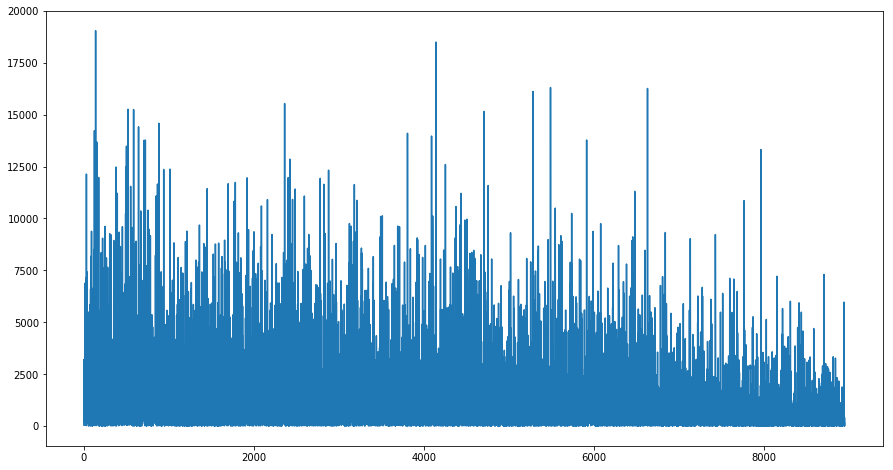

In [638]:
data['BALANCE'].plot(figsize=(15,8))

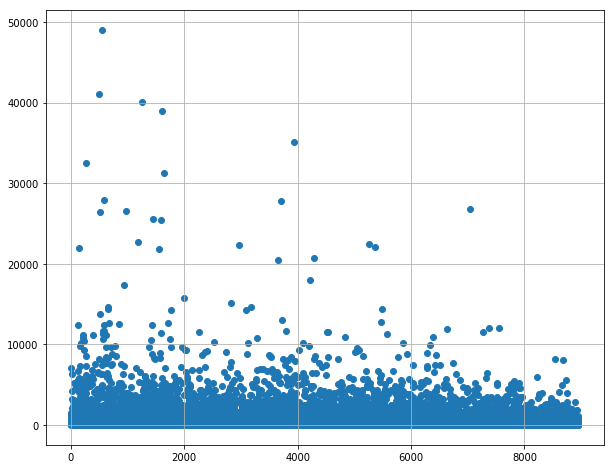

In [639]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES'])
plt.grid()

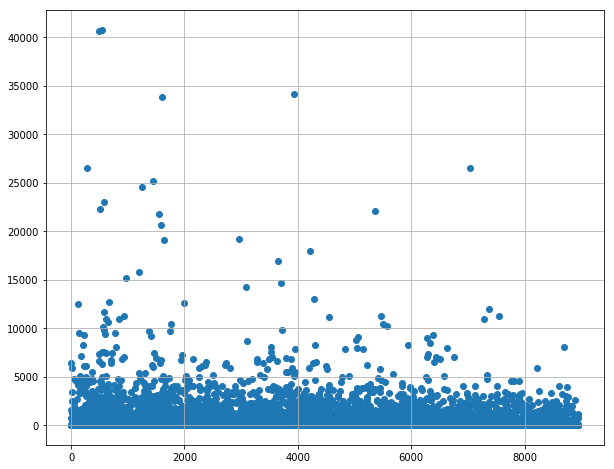

In [640]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])
plt.grid()

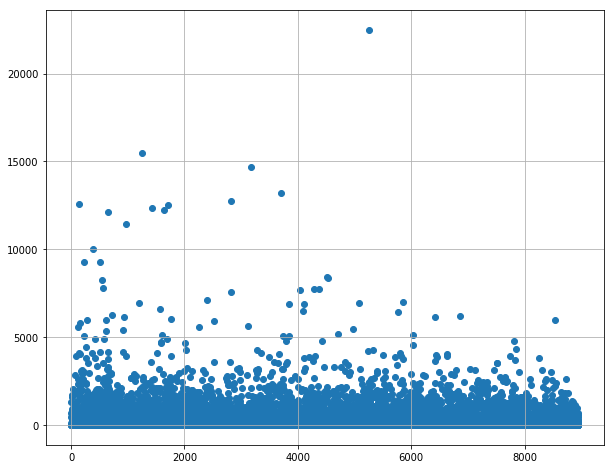

In [641]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])
plt.grid()

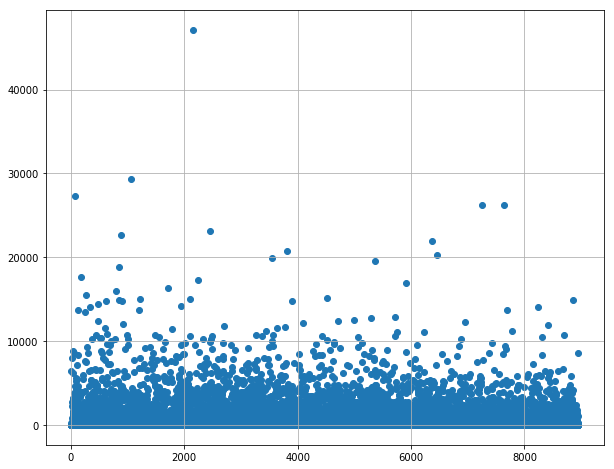

In [642]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['CASH_ADVANCE'])
plt.grid()

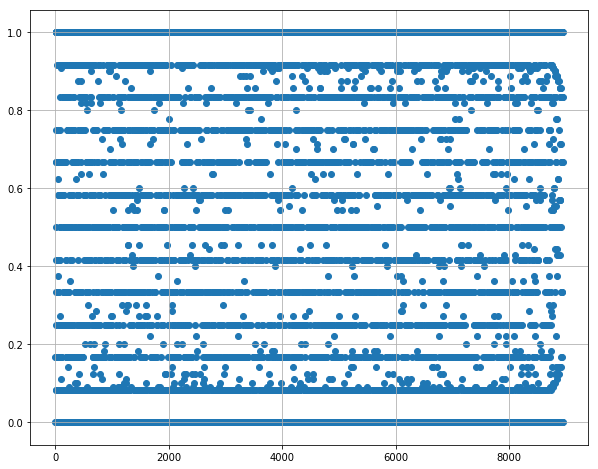

In [643]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])
plt.grid()

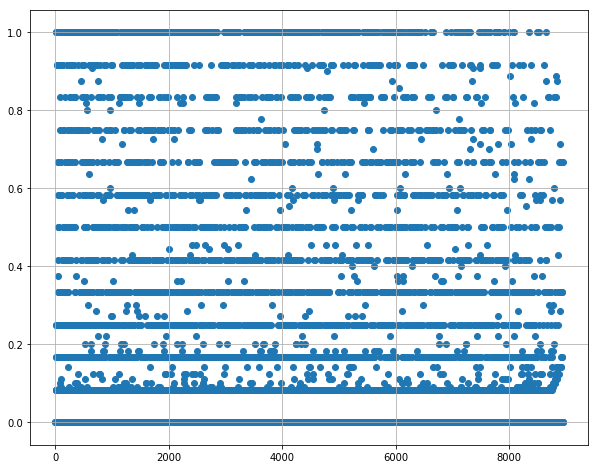

In [644]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

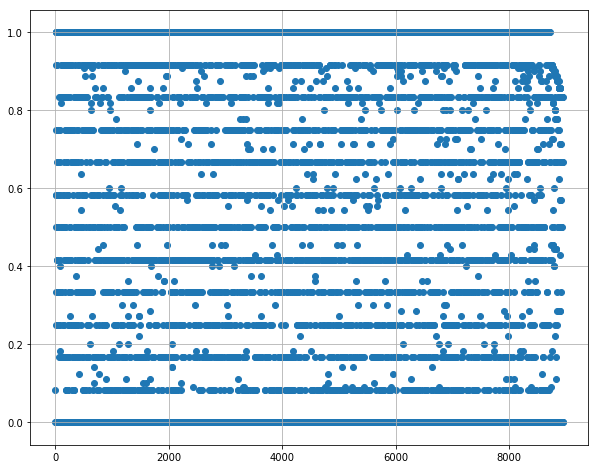

In [645]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.grid()

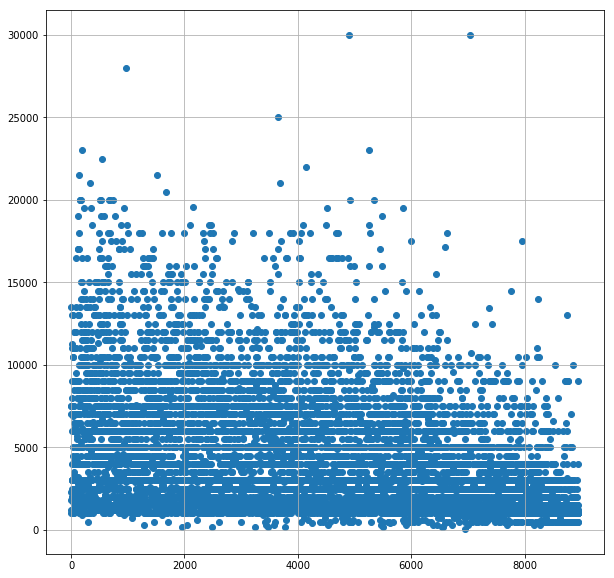

In [646]:
plt.subplots(figsize=(10,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])
plt.grid()

In [647]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6798885937366909, 0.0)


In [648]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(0.18122958823397178, 6.093161599945184e-67)


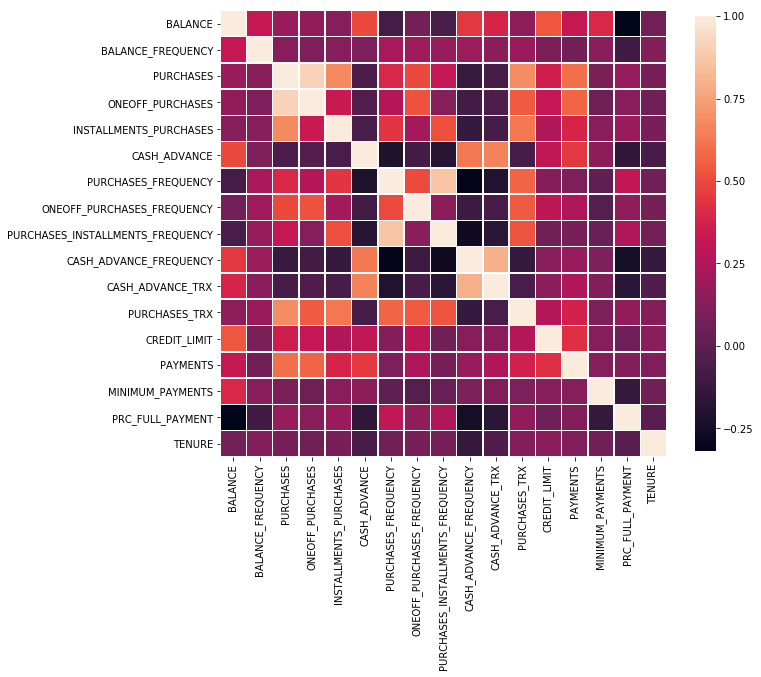

In [649]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

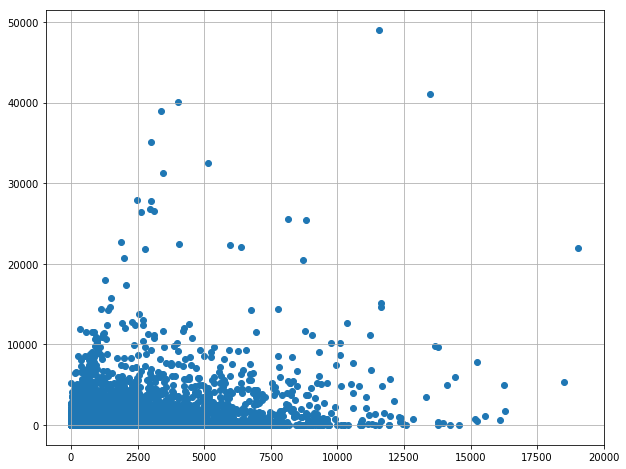

In [650]:
plt.subplots(figsize=(10,8))
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


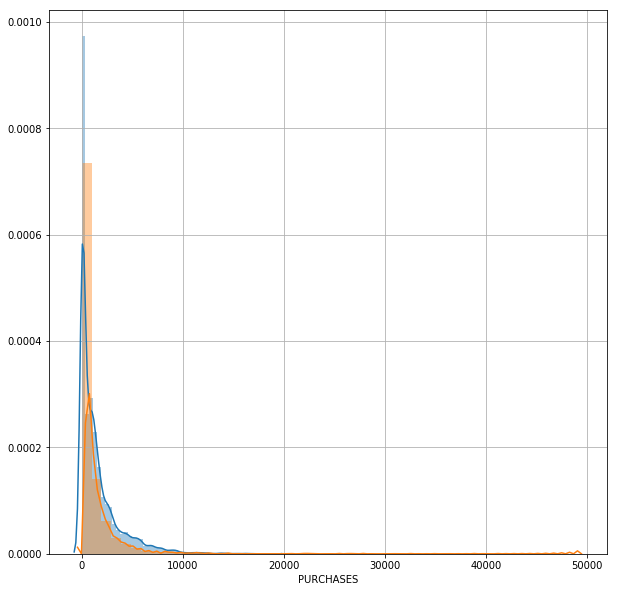

In [651]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


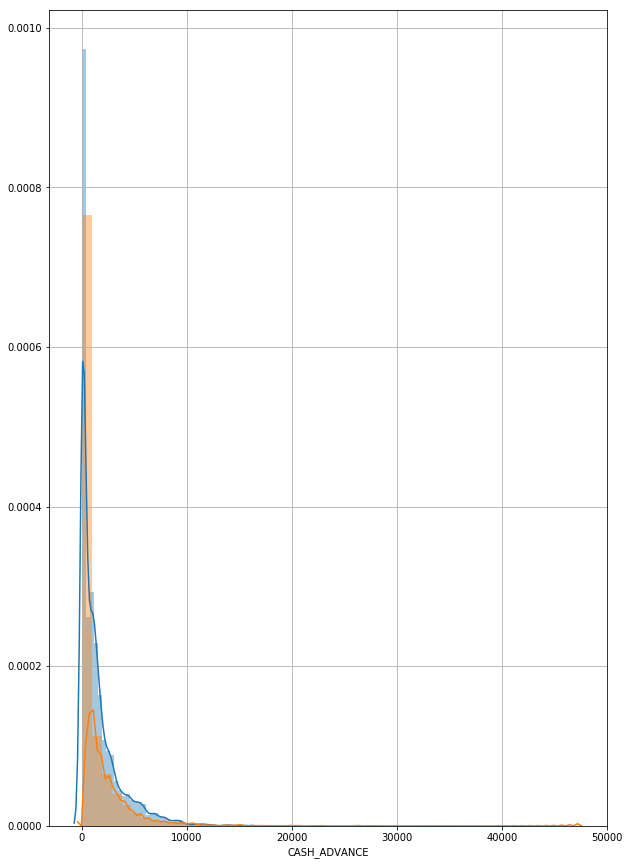

In [652]:
plt.subplots(figsize=(10,15))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


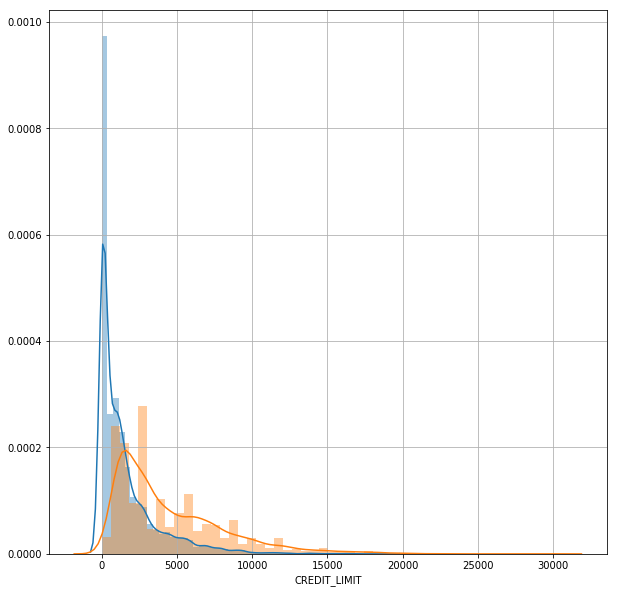

In [653]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


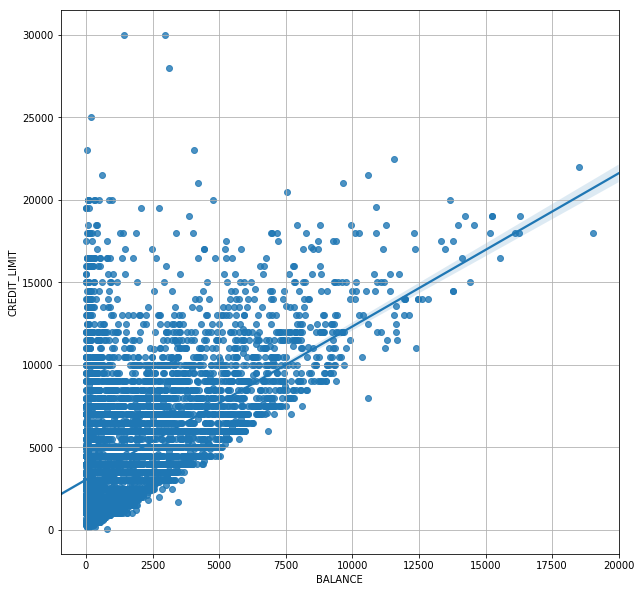

In [654]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


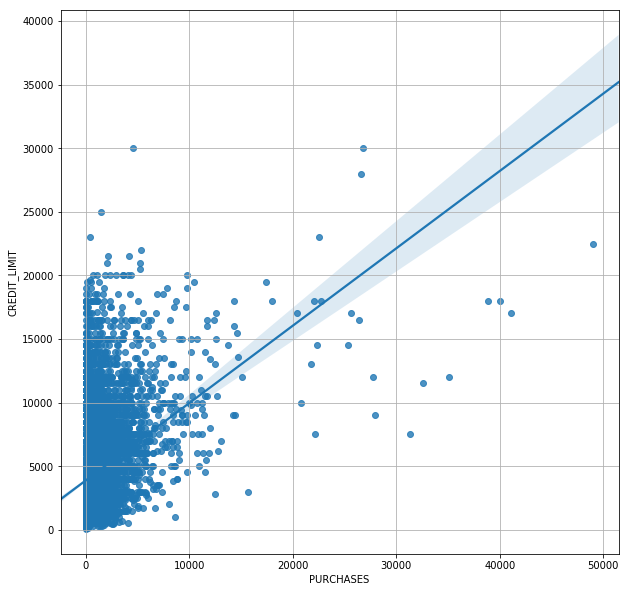

In [655]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


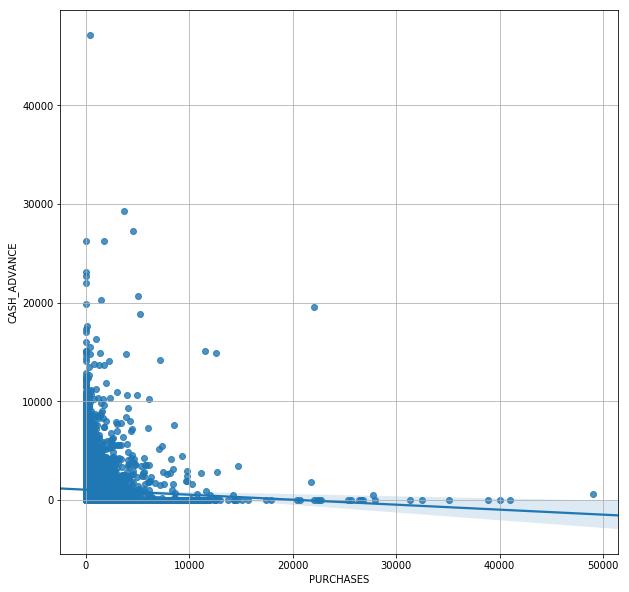

In [656]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CASH_ADVANCE'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


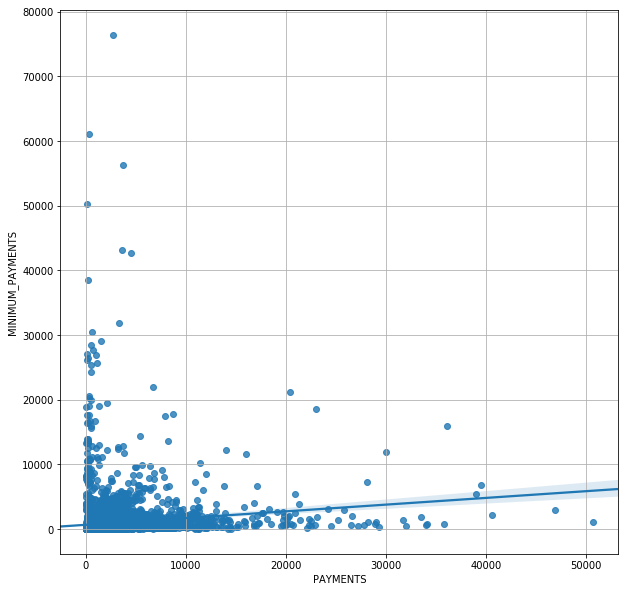

In [657]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PAYMENTS'],data['MINIMUM_PAYMENTS'])
plt.grid()

In [658]:
#CLUSTER ANALYSIS

In [659]:
data.drop('CUST_ID',axis=1,inplace=True)

In [660]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

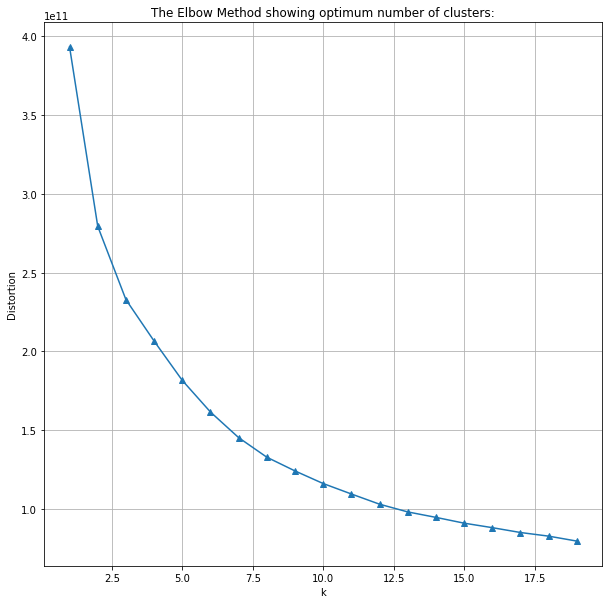

In [661]:
# Plot the elbow
plt.subplots(figsize=(10,10))
plt.plot(K, distortions, '^-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimum number of clusters:')
plt.grid()
plt.show()

Hence, number of optimum clusters will be 10

In [662]:
kmeans = KMeans(init="random", n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [663]:
labels=kmeans.labels_

In [664]:
labels=labels.tolist()

In [665]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [666]:
#Extracting clusters
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

Cluster 0:

In [667]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4922.0,760.730264,778.469485,0.000000,66.196599,527.892744,1223.264228,3992.261885
BALANCE_FREQUENCY,4922.0,0.847730,0.260813,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,4922.0,461.908818,623.965937,0.000000,0.000000,237.540000,624.270000,5065.830000
ONEOFF_PURCHASES,4922.0,218.998397,453.589682,0.000000,0.000000,0.000000,214.845000,4539.700000
INSTALLMENTS_PURCHASES,4922.0,243.131942,404.641615,0.000000,0.000000,59.195000,343.310000,3816.000000
CASH_ADVANCE,4922.0,429.739353,733.637994,0.000000,0.000000,0.000000,598.900401,5191.738847
PURCHASES_FREQUENCY,4922.0,0.442842,0.392083,0.000000,0.000000,0.333333,0.857143,1.000000
ONEOFF_PURCHASES_FREQUENCY,4922.0,0.120848,0.217882,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4922.0,0.341815,0.389314,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4922.0,0.107604,0.162720,0.000000,0.000000,0.000000,0.166667,1.000000


In [668]:
cluster=data.iloc[labels_x[0].index,:]

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


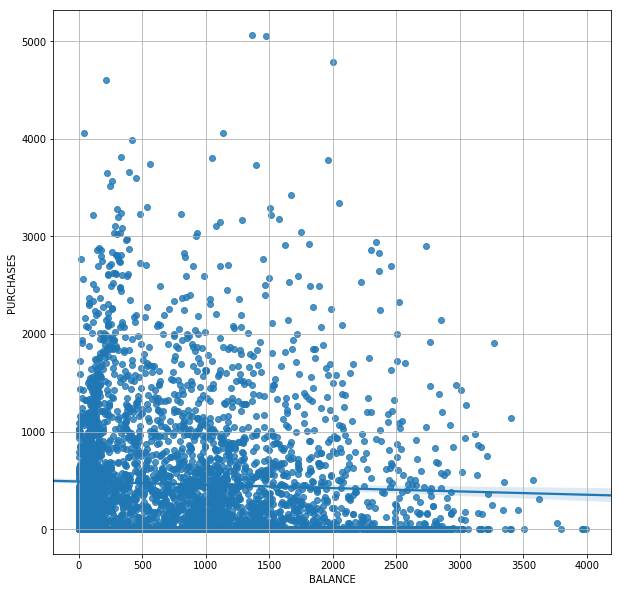

In [669]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

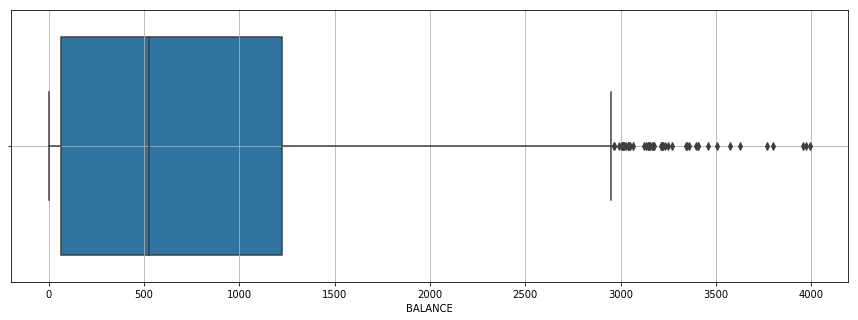

In [670]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [671]:
#Cluster 1:

In [672]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,274.0,2519.023334,2247.399570,0.000000,776.421706,1910.968344,3554.676640,11642.601560
BALANCE_FREQUENCY,274.0,0.969907,0.103040,0.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,274.0,7098.480036,2938.644329,1200.000000,5144.055000,6352.125000,8588.805000,22500.000000
ONEOFF_PURCHASES,274.0,4858.631971,2775.611237,0.000000,3004.617500,4509.325000,6451.037500,14215.000000
INSTALLMENTS_PURCHASES,274.0,2242.037847,2736.170561,0.000000,451.957500,1530.235000,2965.380000,22500.000000
CASH_ADVANCE,274.0,542.940490,1214.196405,0.000000,0.000000,0.000000,228.139435,6419.421654
PURCHASES_FREQUENCY,274.0,0.913448,0.177096,0.083333,0.916667,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,274.0,0.724552,0.287437,0.000000,0.583333,0.818182,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,274.0,0.701864,0.362462,0.000000,0.500000,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,274.0,0.072412,0.155068,0.000000,0.000000,0.000000,0.083333,0.833333


In [673]:
cluster=data.iloc[labels_x[1].index,:]

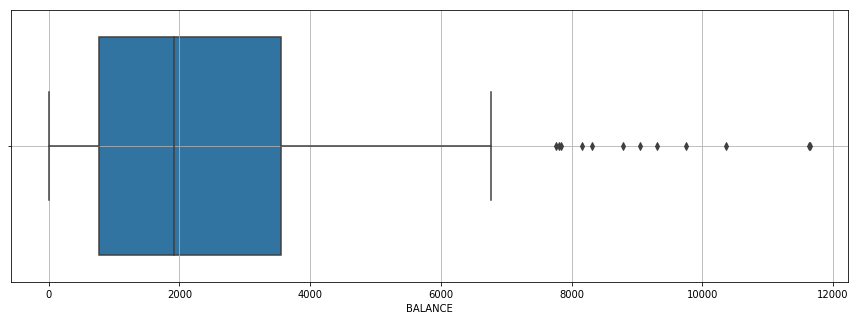

In [674]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


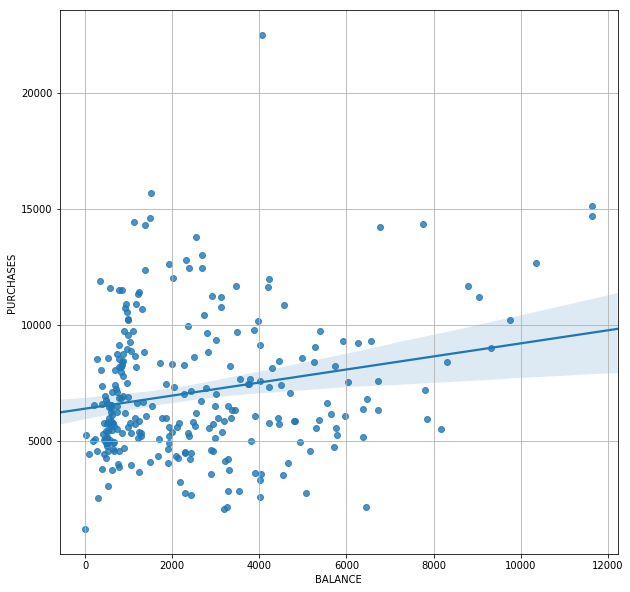

In [675]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [676]:
#Cluster 2:

In [677]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,294.0,8324.719326,2366.467015,3536.601227,6861.367699,7862.659536,9265.756961,18495.558550
BALANCE_FREQUENCY,294.0,0.993197,0.044137,0.545455,1.000000,1.000000,1.000000,1.000000
PURCHASES,294.0,1300.990850,1929.644498,0.000000,0.000000,385.235000,1731.147500,10166.690000
ONEOFF_PURCHASES,294.0,762.209048,1254.946210,0.000000,0.000000,105.565000,1016.537500,7564.810000
INSTALLMENTS_PURCHASES,294.0,539.009524,981.828179,0.000000,0.000000,17.960000,717.840000,6866.690000
CASH_ADVANCE,294.0,3962.363814,2940.810899,0.000000,1837.193712,3649.491162,5457.943655,13674.244020
PURCHASES_FREQUENCY,294.0,0.436643,0.412667,0.000000,0.000000,0.333333,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,294.0,0.229265,0.309296,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,294.0,0.337824,0.399730,0.000000,0.000000,0.041667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,294.0,0.363646,0.268669,0.000000,0.166667,0.333333,0.500000,1.125000


In [678]:
cluster=data.iloc[labels_x[2].index,:]

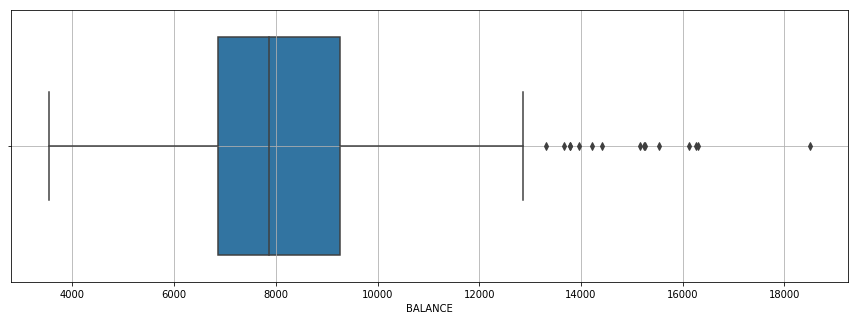

In [679]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


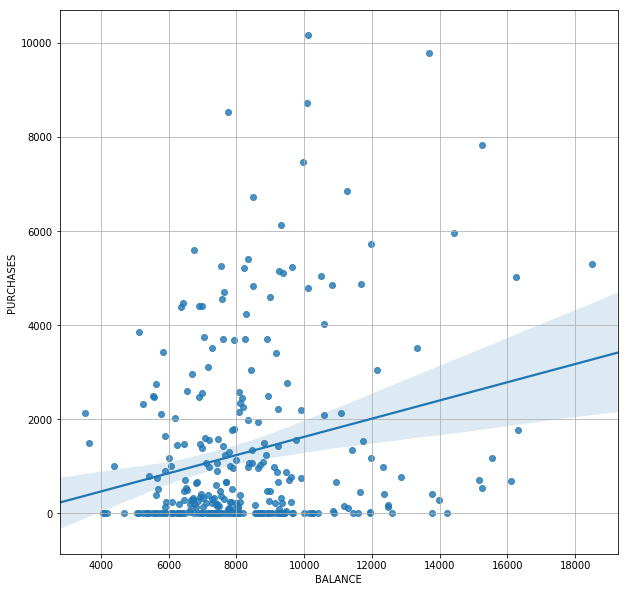

In [680]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [681]:
#Cluster 3:

In [682]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1686.0,855.585383,1002.155660,0.000000,91.743563,377.862428,1428.012090,4624.411724
BALANCE_FREQUENCY,1686.0,0.874897,0.236851,0.000000,0.833333,1.000000,1.000000,1.000000
PURCHASES,1686.0,1319.101993,1213.399422,0.000000,324.475000,986.295000,2071.827500,5677.760000
ONEOFF_PURCHASES,1686.0,761.767450,918.721466,0.000000,0.000000,422.775000,1168.675000,4768.270000
INSTALLMENTS_PURCHASES,1686.0,557.823055,750.488172,0.000000,0.000000,261.290000,849.535000,4538.840000
CASH_ADVANCE,1686.0,182.356602,470.740057,0.000000,0.000000,0.000000,0.000000,3689.517625
PURCHASES_FREQUENCY,1686.0,0.643787,0.362936,0.000000,0.333333,0.750000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,1686.0,0.337918,0.347550,0.000000,0.000000,0.166667,0.583333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1686.0,0.455448,0.402350,0.000000,0.000000,0.416667,0.916667,1.000000
CASH_ADVANCE_FREQUENCY,1686.0,0.045804,0.110810,0.000000,0.000000,0.000000,0.000000,0.833333


In [683]:
cluster=data.iloc[labels_x[3].index,:]

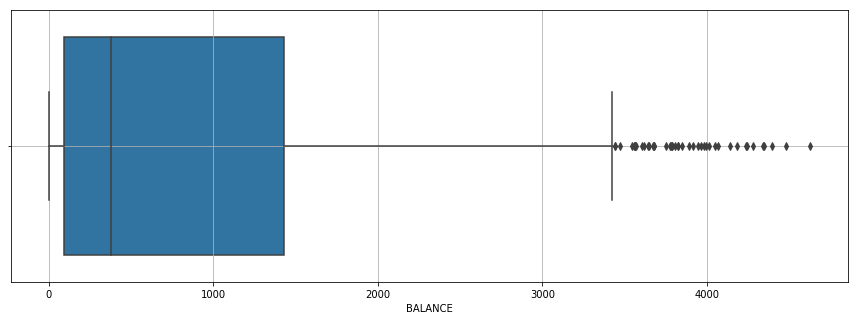

In [684]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


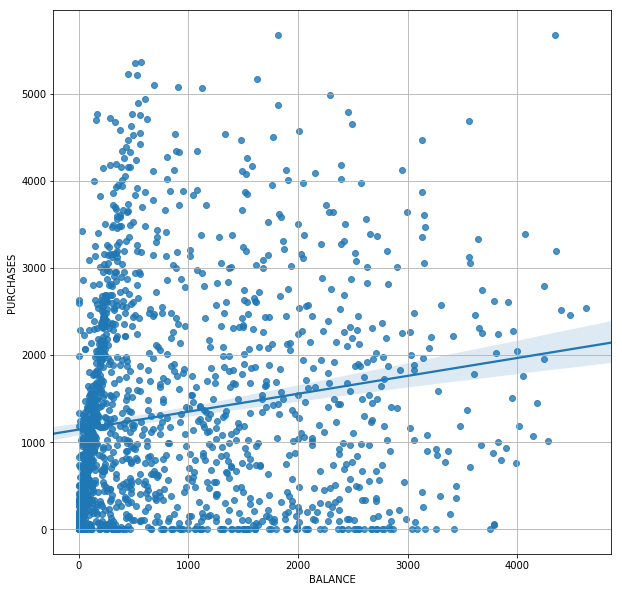

In [685]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [686]:
#Cluster 4:

In [687]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,124.0,5065.161555,3222.797299,4.382924,2605.705024,4928.416929,6973.721728,14581.45914
BALANCE_FREQUENCY,124.0,0.875818,0.240558,0.090909,0.893750,1.000000,1.000000,1.00000
PURCHASES,124.0,1275.546290,2180.297439,0.000000,0.000000,120.120000,1692.080000,11500.94000
ONEOFF_PURCHASES,124.0,733.976290,1342.973851,0.000000,0.000000,0.000000,823.362500,6701.08000
INSTALLMENTS_PURCHASES,124.0,541.747419,1249.780725,0.000000,0.000000,0.000000,520.072500,8409.93000
CASH_ADVANCE,124.0,10395.196811,6828.107641,0.000000,6339.613408,9418.410641,13495.935818,47137.21176
PURCHASES_FREQUENCY,124.0,0.338384,0.403828,0.000000,0.000000,0.083333,0.750000,1.00000
ONEOFF_PURCHASES_FREQUENCY,124.0,0.186714,0.286354,0.000000,0.000000,0.000000,0.270833,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,124.0,0.255881,0.380942,0.000000,0.000000,0.000000,0.520833,1.00000
CASH_ADVANCE_FREQUENCY,124.0,0.480520,0.283910,0.000000,0.250000,0.416667,0.666667,1.00000


In [688]:
cluster=data.iloc[labels_x[4].index,:]

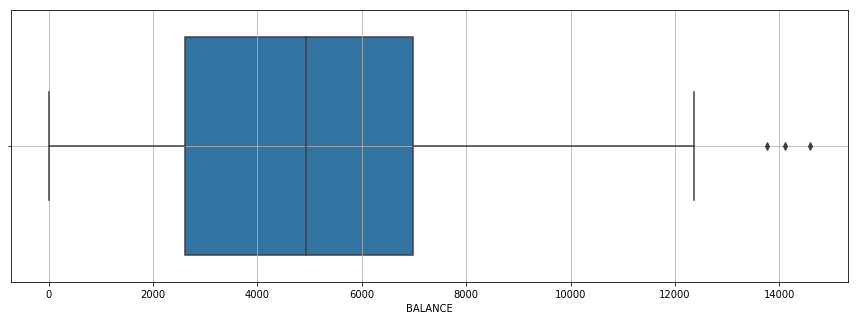

In [689]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


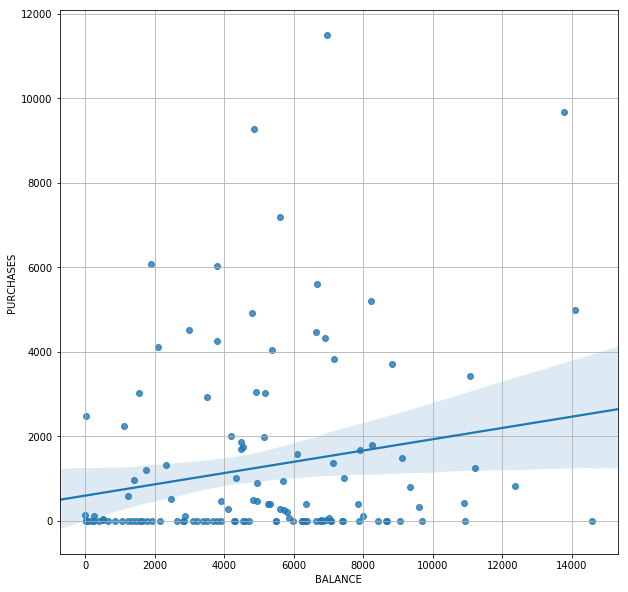

In [690]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [691]:
#Cluster 5:

In [692]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,19.0,5430.989147,2210.812633,2748.868773,3598.996958,4976.028578,6536.965368,10571.411070
BALANCE_FREQUENCY,19.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,19.0,1036.835789,1823.472119,0.000000,0.000000,419.640000,939.570000,7739.480000
ONEOFF_PURCHASES,19.0,71.332105,198.894322,0.000000,0.000000,0.000000,10.000000,669.000000
INSTALLMENTS_PURCHASES,19.0,965.503684,1811.813254,0.000000,0.000000,349.450000,939.570000,7739.480000
CASH_ADVANCE,19.0,872.917494,1601.075891,0.000000,0.000000,0.000000,572.176381,4909.937494
PURCHASES_FREQUENCY,19.0,0.520335,0.475701,0.000000,0.000000,0.636364,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,19.0,0.035088,0.080103,0.000000,0.000000,0.000000,0.041667,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,19.0,0.498405,0.493269,0.000000,0.000000,0.636364,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,19.0,0.065789,0.098519,0.000000,0.000000,0.000000,0.083333,0.333333


In [693]:
cluster=data.iloc[labels_x[5].index,:]

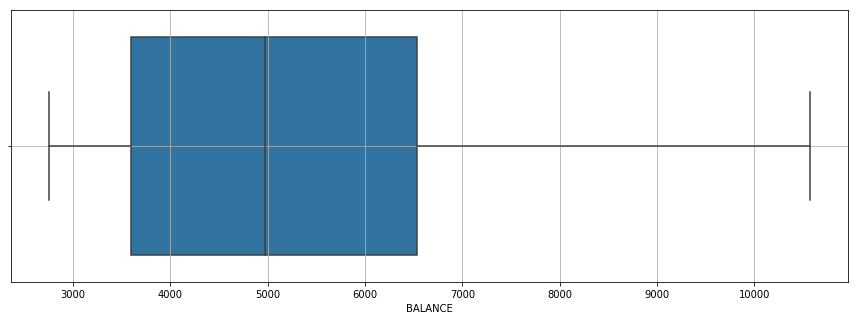

In [694]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


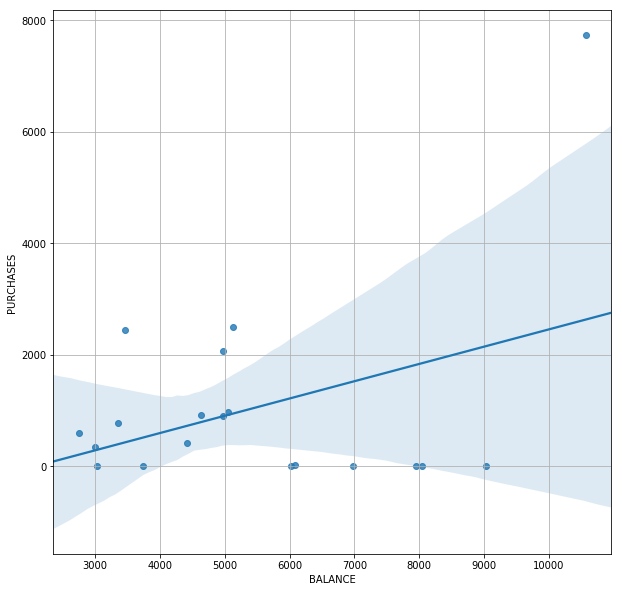

In [695]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [696]:
#Cluster 6:

In [697]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,483.0,1506.830727,1776.341582,0.000000,125.408316,448.190189,2968.202975,6057.280526
BALANCE_FREQUENCY,483.0,0.873528,0.235332,0.000000,0.833333,1.000000,1.000000,1.000000
PURCHASES,483.0,1526.810248,1416.622724,0.000000,369.745000,1131.080000,2300.265000,6407.670000
ONEOFF_PURCHASES,483.0,956.485010,1089.529511,0.000000,49.440000,569.900000,1424.205000,6300.400000
INSTALLMENTS_PURCHASES,483.0,570.426687,759.357821,0.000000,0.000000,260.000000,822.340000,4116.000000
CASH_ADVANCE,483.0,397.364227,959.907697,0.000000,0.000000,0.000000,97.219743,6523.780195
PURCHASES_FREQUENCY,483.0,0.647479,0.371250,0.000000,0.333333,0.833333,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,483.0,0.396746,0.368870,0.000000,0.083333,0.250000,0.750000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,483.0,0.434073,0.392049,0.000000,0.000000,0.416667,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,483.0,0.063249,0.141804,0.000000,0.000000,0.000000,0.083333,0.916667


In [698]:
cluster=data.iloc[labels_x[6].index,:]

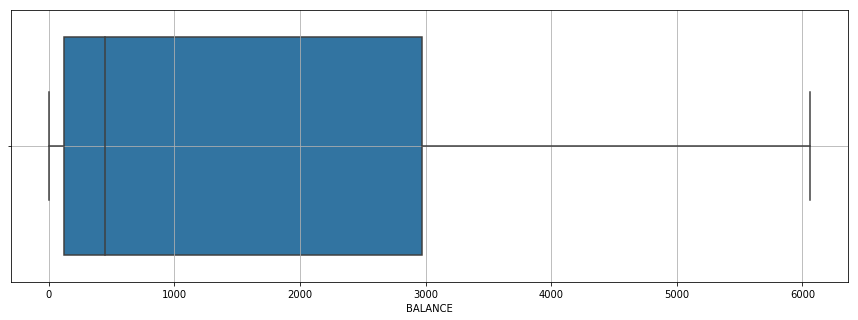

In [699]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


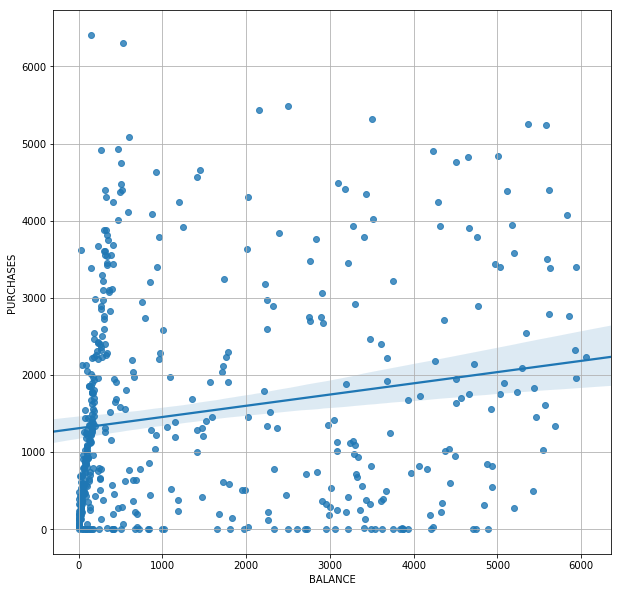

In [700]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [701]:
#Cluster 7:

In [702]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,86.0,2730.445853,2033.475463,758.118109,1337.255617,1879.427080,3493.213162,11209.370760
BALANCE_FREQUENCY,86.0,0.981560,0.056169,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,86.0,863.625116,1695.287644,0.000000,0.000000,248.370000,792.665000,11147.330000
ONEOFF_PURCHASES,86.0,130.801395,441.493727,0.000000,0.000000,0.000000,44.737500,2951.930000
INSTALLMENTS_PURCHASES,86.0,732.823721,1577.000084,0.000000,0.000000,118.695000,570.905000,10009.930000
CASH_ADVANCE,86.0,796.606949,1506.726308,0.000000,0.000000,28.940402,1097.402920,10616.270140
PURCHASES_FREQUENCY,86.0,0.468862,0.419038,0.000000,0.000000,0.416667,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,86.0,0.040404,0.071790,0.000000,0.000000,0.000000,0.083333,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,86.0,0.440174,0.430084,0.000000,0.000000,0.416667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,86.0,0.109790,0.131908,0.000000,0.000000,0.083333,0.166667,0.500000


In [703]:
cluster=data.iloc[labels_x[7].index,:]

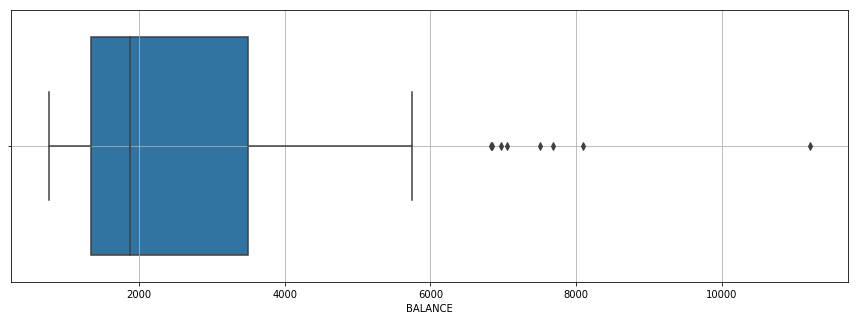

In [704]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


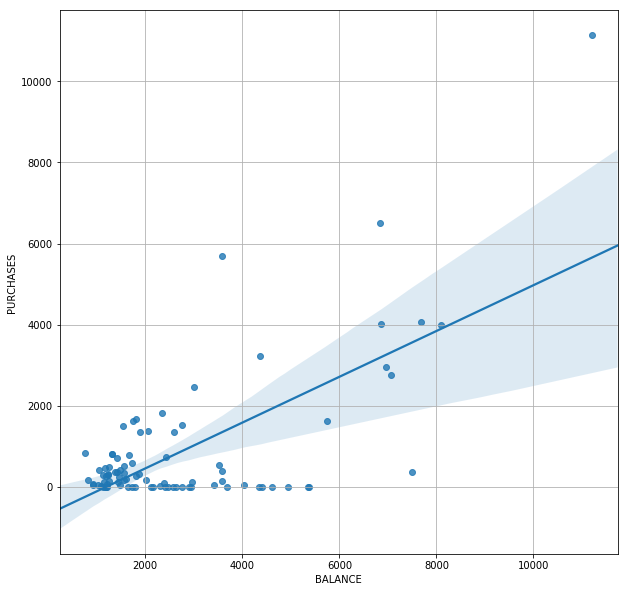

In [705]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [706]:
#Cluster 8:

In [707]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,24.0,5405.330935,4317.955150,1268.809031,2741.523040,3422.898250,6817.133432,19043.138560
BALANCE_FREQUENCY,24.0,0.957955,0.151737,0.272727,1.000000,1.000000,1.000000,1.000000
PURCHASES,24.0,27276.363750,8585.708142,12551.950000,21958.090000,26008.730000,31609.457500,49039.570000
ONEOFF_PURCHASES,24.0,21877.102917,8649.208460,9449.070000,15636.290000,21224.335000,25470.657500,40761.250000
INSTALLMENTS_PURCHASES,24.0,5399.260833,4754.823099,0.000000,905.647500,4828.500000,7874.782500,15497.190000
CASH_ADVANCE,24.0,1550.378389,4884.159872,0.000000,0.000000,0.000000,0.000000,19513.474830
PURCHASES_FREQUENCY,24.0,0.909028,0.223768,0.166667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,24.0,0.842361,0.241322,0.166667,0.666667,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,24.0,0.720833,0.373657,0.000000,0.541666,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,24.0,0.059028,0.165720,0.000000,0.000000,0.000000,0.000000,0.666667


In [708]:
cluster=data.iloc[labels_x[8].index,:]

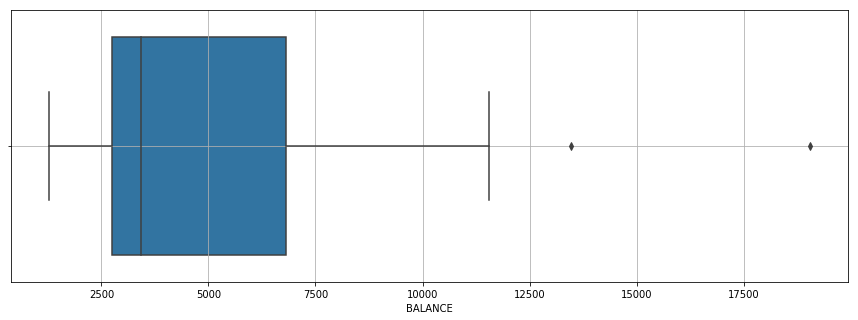

In [709]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


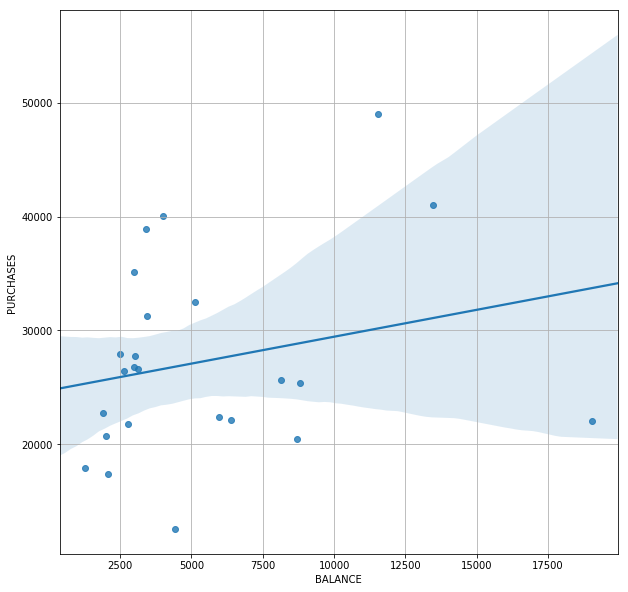

In [710]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [711]:
#Cluster 9:

In [712]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1037.0,3716.398999,1590.196229,8.640998,2560.743960,3725.636832,4890.470857,7760.940543
BALANCE_FREQUENCY,1037.0,0.953836,0.125531,0.181818,1.000000,1.000000,1.000000,1.000000
PURCHASES,1037.0,491.288139,797.057399,0.000000,0.000000,86.100000,680.970000,4767.110000
ONEOFF_PURCHASES,1037.0,283.567792,566.969978,0.000000,0.000000,0.000000,310.700000,4139.560000
INSTALLMENTS_PURCHASES,1037.0,207.753828,449.465320,0.000000,0.000000,0.000000,216.280000,4098.650000
CASH_ADVANCE,1037.0,3299.078673,2074.515636,0.000000,1864.566564,3075.115015,4359.325750,10735.101800
PURCHASES_FREQUENCY,1037.0,0.306816,0.371779,0.000000,0.000000,0.083333,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,1037.0,0.137301,0.235112,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1037.0,0.206147,0.333712,0.000000,0.000000,0.000000,0.333333,1.000000
CASH_ADVANCE_FREQUENCY,1037.0,0.360201,0.228480,0.000000,0.166667,0.333333,0.500000,1.500000


In [713]:
cluster=data.iloc[labels_x[9].index,:]

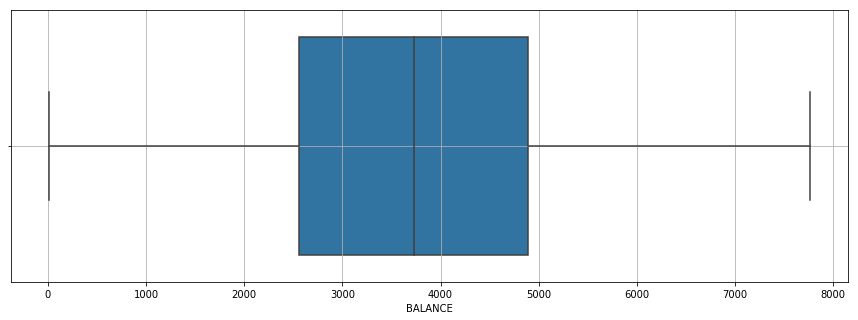

In [714]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


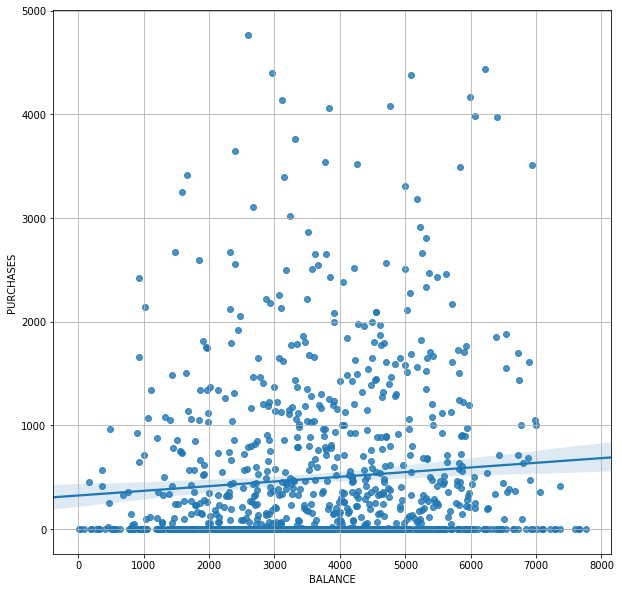

In [715]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [716]:
#Outlier Treatment

In [717]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
x=q3-q1
lower=q1-(1.5*x)
upper=q3+(1.5*x)

In [718]:
num=list()
for i in data.columns:
    if i in lower.index:
        num.append(i)

In [719]:
data=data[num]

In [720]:
data=data[~((data < (q1 - 1.5 * x))|(data > (q3 + 1.5 * x))).any(axis=1)]

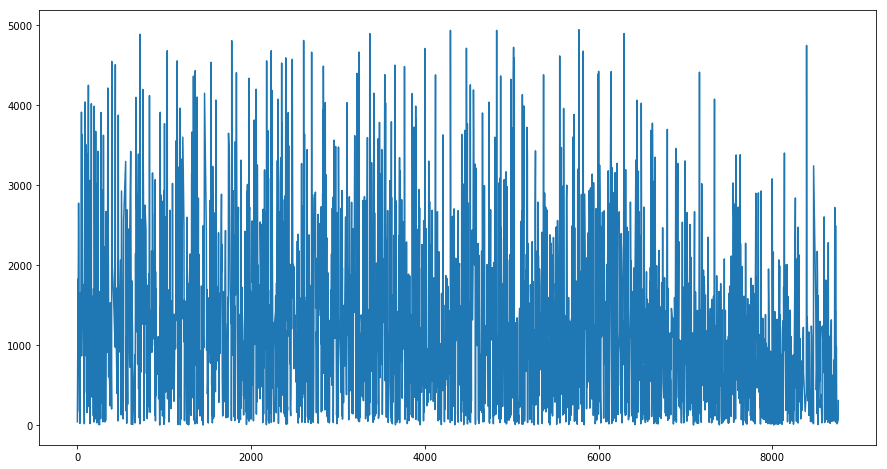

In [721]:
data['BALANCE'].plot(figsize=(15,8))

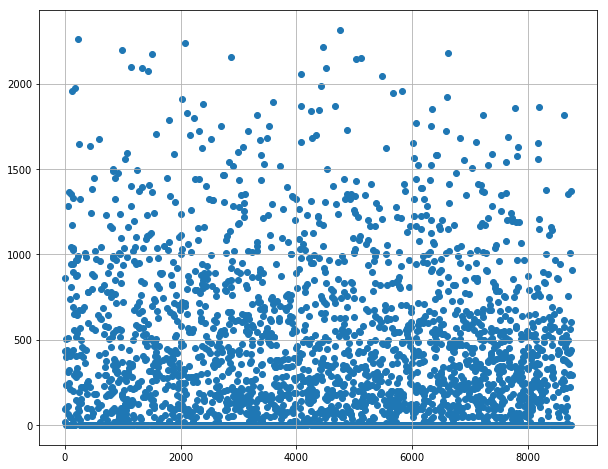

In [722]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES'])
plt.grid()

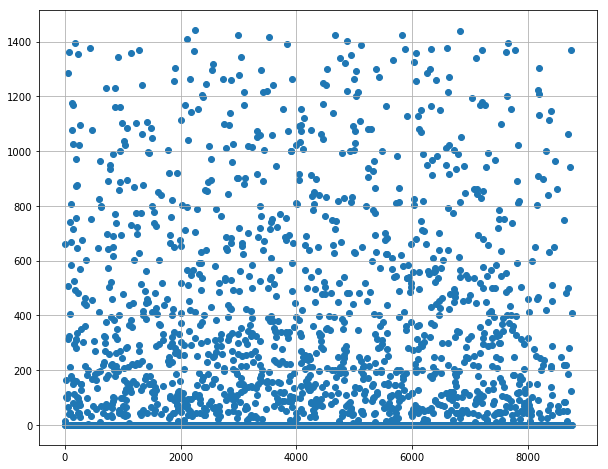

In [723]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])
plt.grid()

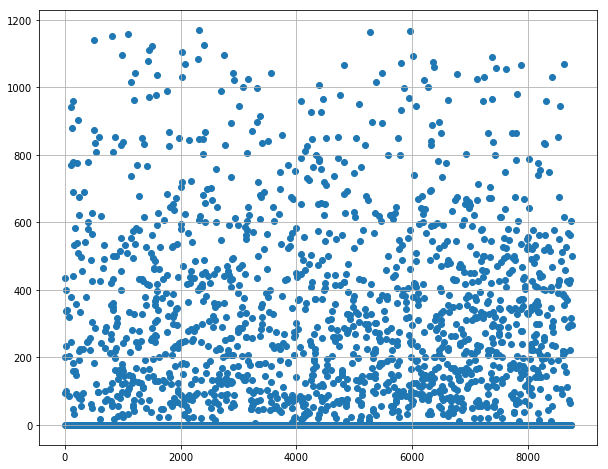

In [724]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])
plt.grid()

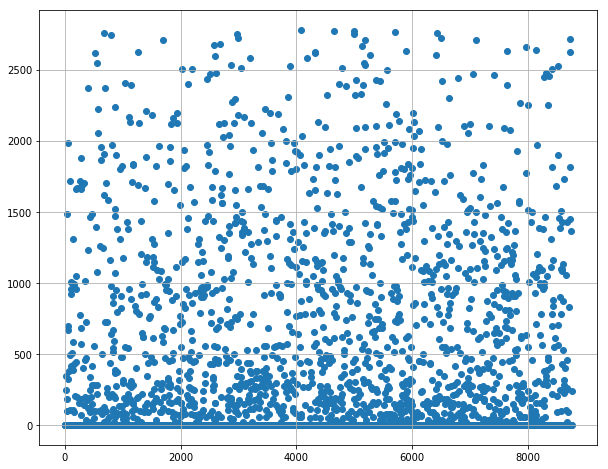

In [725]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['CASH_ADVANCE'])
plt.grid()

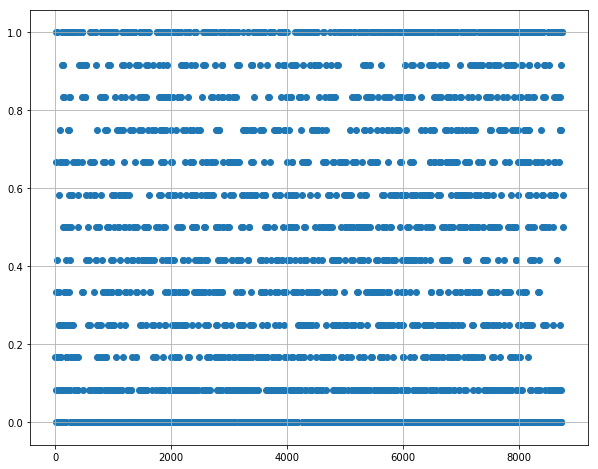

In [726]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])
plt.grid()

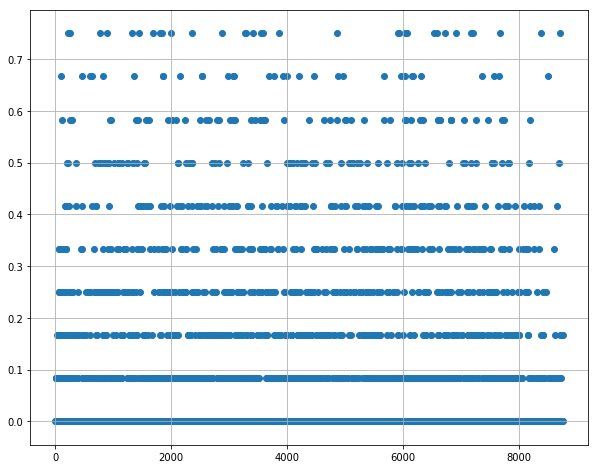

In [727]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

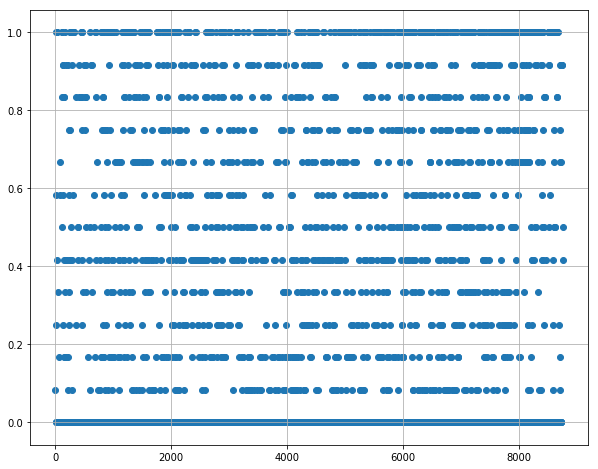

In [728]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.grid()

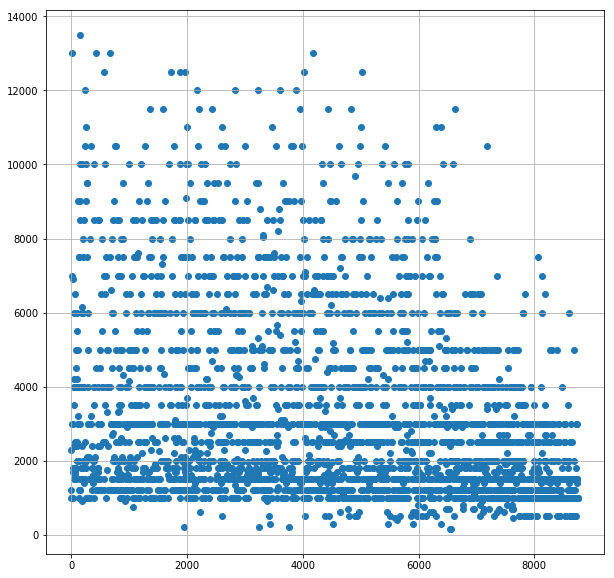

In [729]:
plt.subplots(figsize=(10,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])
plt.grid()

In [730]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6688900665933358, 0.0)


In [731]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(-0.033514330319000925, 0.06708340452056054)


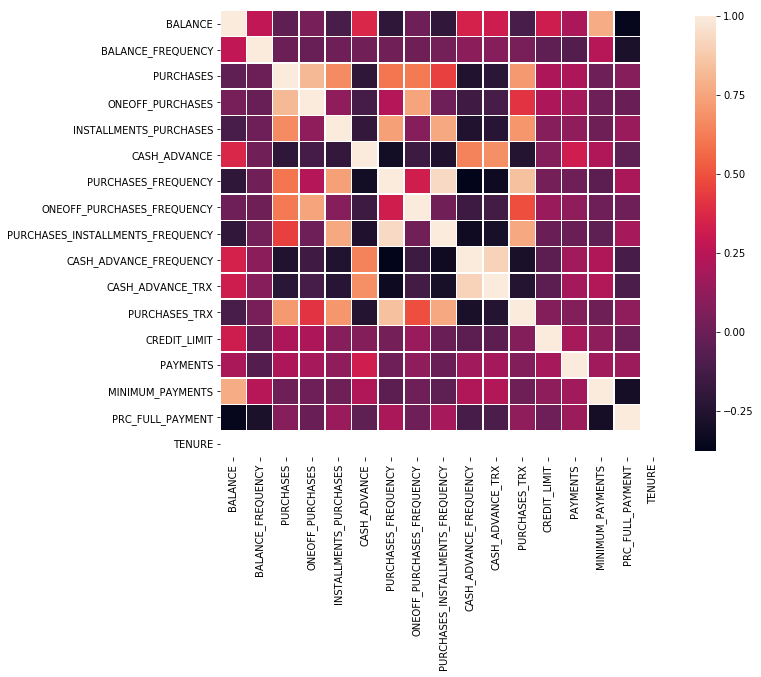

In [732]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

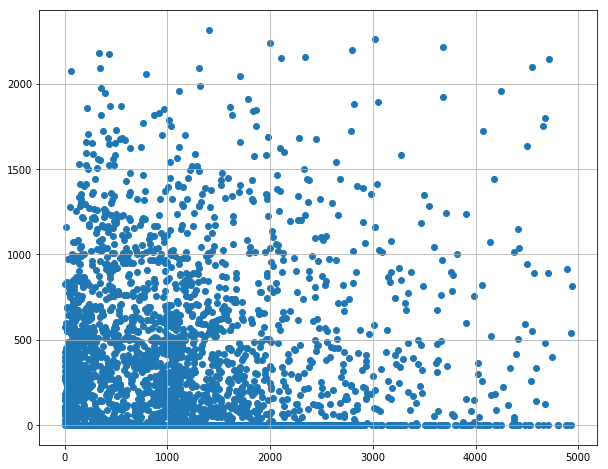

In [733]:
plt.subplots(figsize=(10,8))
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


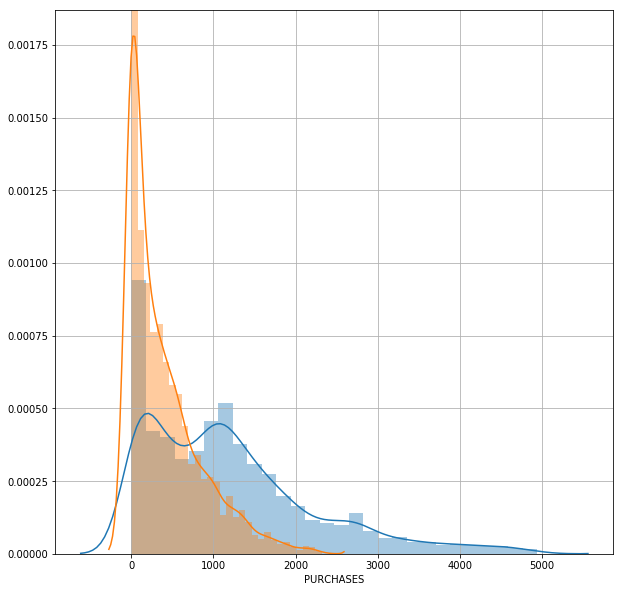

In [734]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


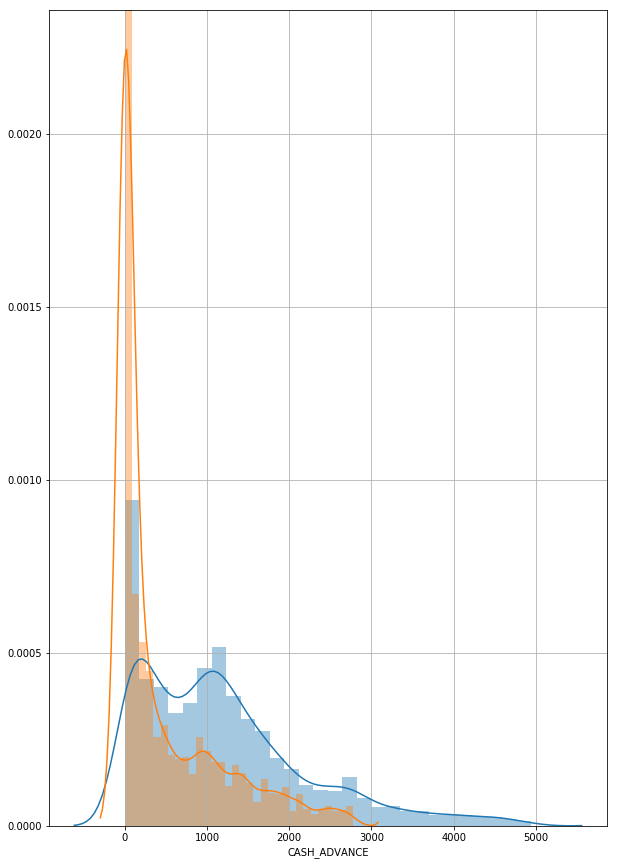

In [735]:
plt.subplots(figsize=(10,15))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


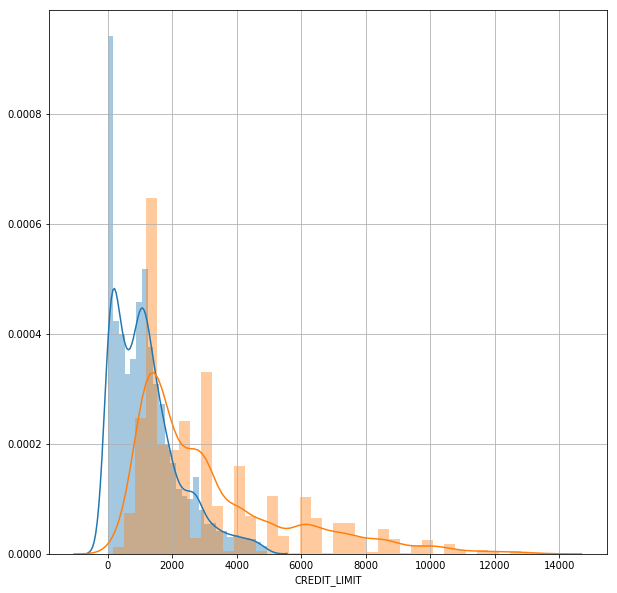

In [736]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


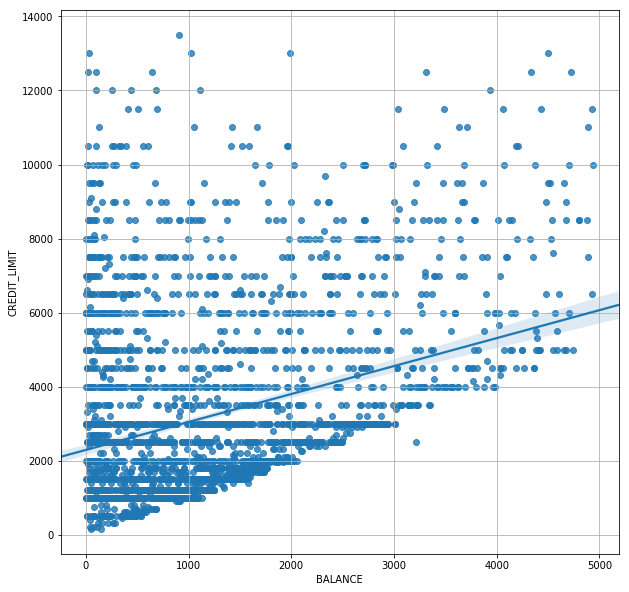

In [737]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


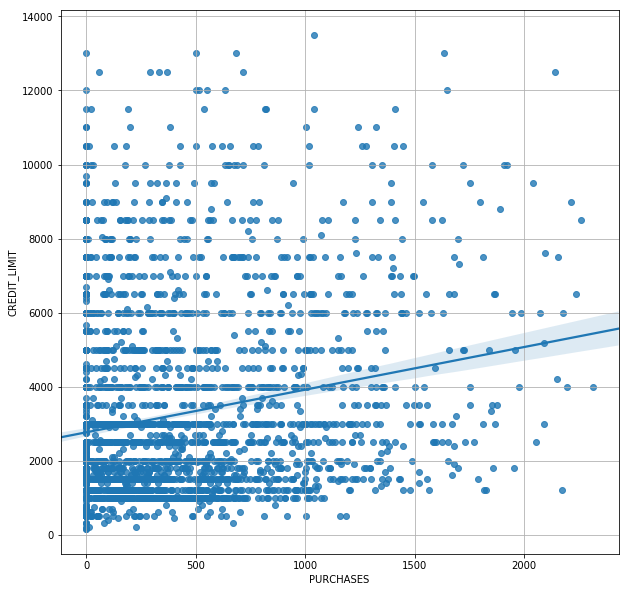

In [738]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


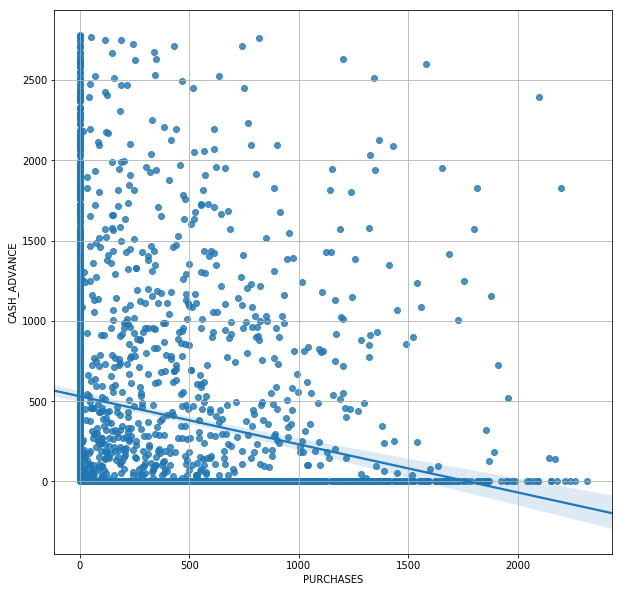

In [739]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CASH_ADVANCE'])
plt.grid()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


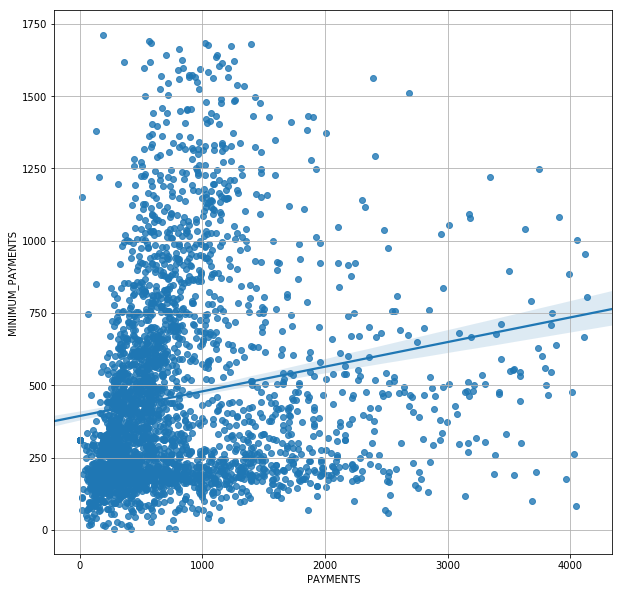

In [740]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PAYMENTS'],data['MINIMUM_PAYMENTS'])
plt.grid()

In [741]:
#CLUSTER ANALYSIS

In [742]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

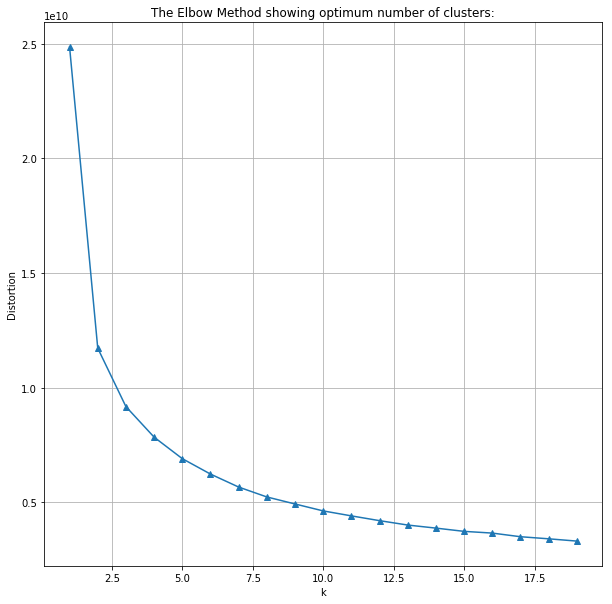

In [743]:
# Plot the elbow
plt.subplots(figsize=(10,10))
plt.plot(K, distortions, '^-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimum number of clusters:')
plt.grid()
plt.show()

In [744]:
#Hence, number of optimum clusters will be 10

In [745]:
kmeans = KMeans(init="random", n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [746]:
labels=kmeans.labels_

In [747]:
labels=labels.tolist()

In [748]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [749]:
#Extracting clusters
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

In [750]:
#Cluster 0:

In [751]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,92.0,683.986106,600.805528,5.871769,134.336755,498.041027,1071.703542,2022.469335
BALANCE_FREQUENCY,92.0,0.952569,0.089882,0.727273,0.909091,1.000000,1.000000,1.000000
PURCHASES,92.0,550.614239,510.798450,0.000000,129.645000,445.620000,724.850000,2042.500000
ONEOFF_PURCHASES,92.0,322.685761,390.868756,0.000000,0.000000,151.040000,507.587500,1392.830000
INSTALLMENTS_PURCHASES,92.0,227.928478,288.760668,0.000000,0.000000,91.450000,399.155000,1104.790000
CASH_ADVANCE,92.0,250.810364,598.199634,0.000000,0.000000,0.000000,101.628557,2583.510846
PURCHASES_FREQUENCY,92.0,0.450181,0.336990,0.000000,0.145834,0.458334,0.750000,1.000000
ONEOFF_PURCHASES_FREQUENCY,92.0,0.160326,0.176554,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,92.0,0.333333,0.350083,0.000000,0.000000,0.208334,0.583333,1.000000
CASH_ADVANCE_FREQUENCY,92.0,0.049819,0.105597,0.000000,0.000000,0.000000,0.083333,0.500000


In [752]:
cluster=data.iloc[labels_x[0].index,:]

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


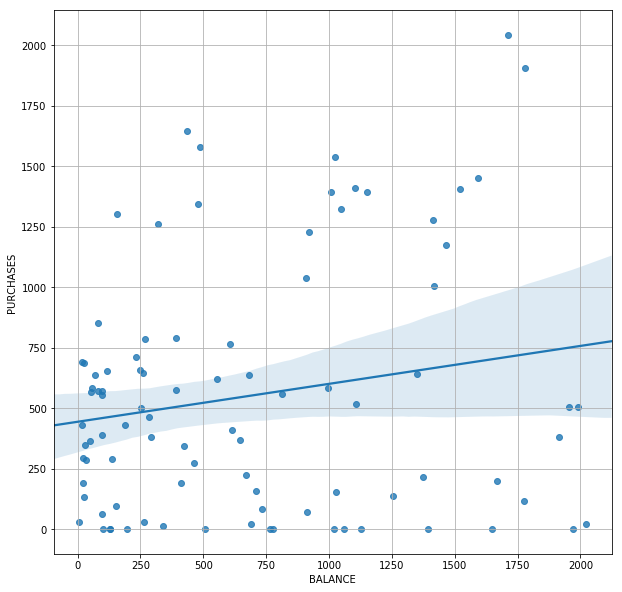

In [753]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

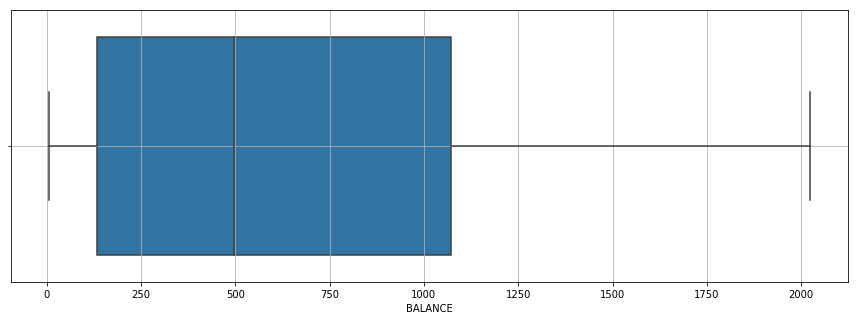

In [754]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [755]:
#Cluster 1:

In [756]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,732.0,561.978714,382.053075,3.574463,183.093012,532.098213,943.003342,1196.869653
BALANCE_FREQUENCY,732.0,0.976776,0.064434,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,732.0,278.095546,323.565826,0.000000,0.000000,178.000000,440.802500,2171.860000
ONEOFF_PURCHASES,732.0,115.796995,243.187071,0.000000,0.000000,0.000000,112.600000,1408.820000
INSTALLMENTS_PURCHASES,732.0,162.734057,218.729241,0.000000,0.000000,56.045000,272.712500,1125.760000
CASH_ADVANCE,732.0,180.242675,333.160588,0.000000,0.000000,0.000000,182.734918,1903.840296
PURCHASES_FREQUENCY,732.0,0.419854,0.387118,0.000000,0.000000,0.333333,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,732.0,0.082650,0.148968,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,732.0,0.348475,0.396908,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,732.0,0.077869,0.112863,0.000000,0.000000,0.000000,0.166667,0.500000


In [757]:
cluster=data.iloc[labels_x[1].index,:]

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


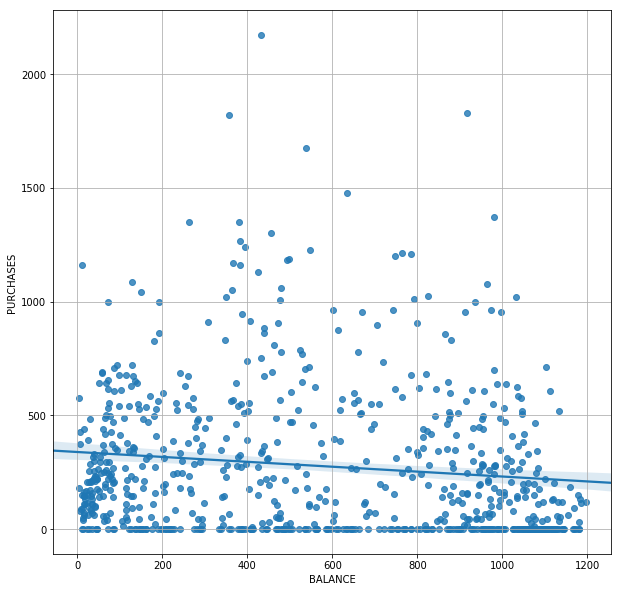

In [758]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

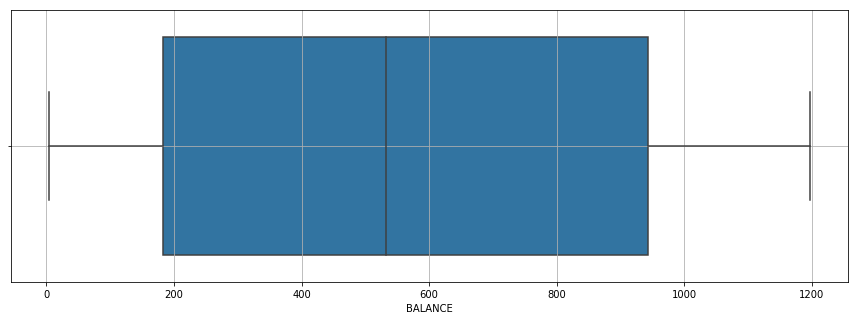

In [759]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [760]:
#Cluster 2:

In [761]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,252.0,629.699470,571.541934,2.911999,152.789497,448.798629,1034.531426,2191.369256
BALANCE_FREQUENCY,252.0,0.962843,0.080926,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,252.0,542.284246,471.372469,0.000000,159.990000,427.650000,819.740000,2151.930000
ONEOFF_PURCHASES,252.0,290.321151,373.550275,0.000000,0.000000,112.000000,501.050000,1417.180000
INSTALLMENTS_PURCHASES,252.0,251.963095,272.194490,0.000000,0.000000,165.855000,412.377500,1083.120000
CASH_ADVANCE,252.0,141.670556,321.462018,0.000000,0.000000,0.000000,0.000000,1655.625508
PURCHASES_FREQUENCY,252.0,0.519841,0.352131,0.000000,0.166667,0.500000,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,252.0,0.154100,0.187469,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,252.0,0.407407,0.376625,0.000000,0.000000,0.333333,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,252.0,0.040013,0.086893,0.000000,0.000000,0.000000,0.000000,0.500000


In [762]:
cluster=data.iloc[labels_x[2].index,:]

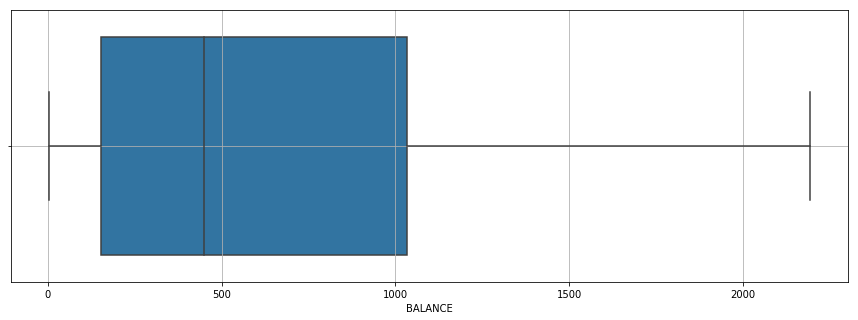

In [763]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


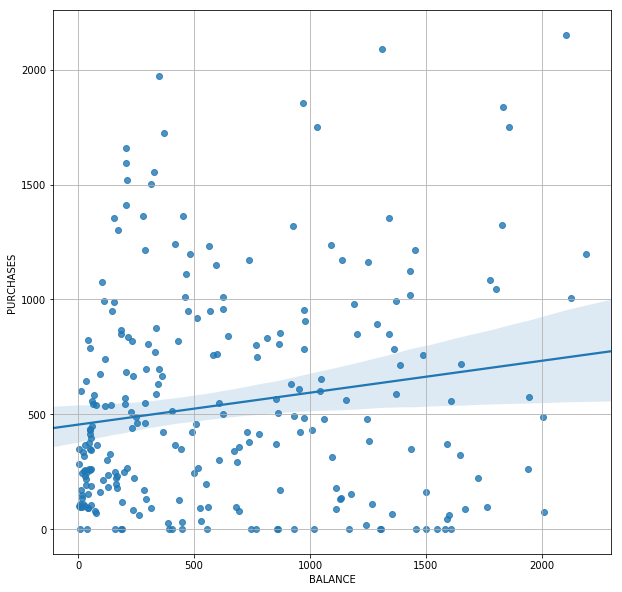

In [764]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [765]:
#Cluster 3:

In [766]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,163.0,3321.332213,793.450033,1386.020611,2701.709713,3367.300661,3957.992504,4931.203112
BALANCE_FREQUENCY,163.0,0.998327,0.015883,0.818182,1.000000,1.000000,1.000000,1.000000
PURCHASES,163.0,288.075460,419.504860,0.000000,0.000000,53.130000,422.620000,1957.300000
ONEOFF_PURCHASES,163.0,170.682270,308.992226,0.000000,0.000000,0.000000,216.520000,1443.330000
INSTALLMENTS_PURCHASES,163.0,117.393190,235.802033,0.000000,0.000000,0.000000,113.265000,1043.000000
CASH_ADVANCE,163.0,1260.760327,840.308506,0.000000,614.596620,1241.559904,1962.715817,2780.106659
PURCHASES_FREQUENCY,163.0,0.253579,0.321464,0.000000,0.000000,0.083333,0.500000,1.000000
ONEOFF_PURCHASES_FREQUENCY,163.0,0.098671,0.167753,0.000000,0.000000,0.000000,0.125000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,163.0,0.166667,0.289861,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_FREQUENCY,163.0,0.209611,0.143550,0.000000,0.083333,0.166667,0.333333,0.500000


In [767]:
cluster=data.iloc[labels_x[3].index,:]

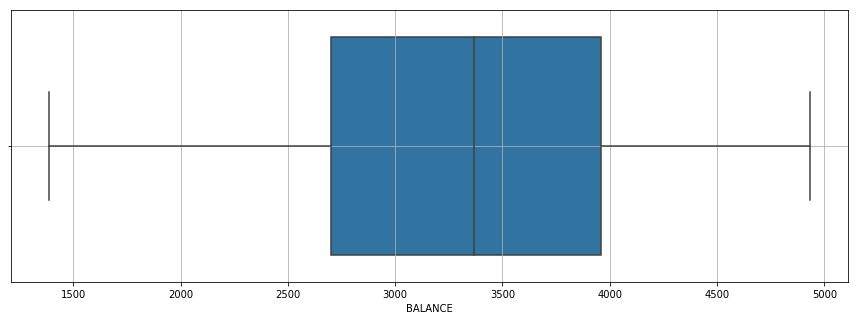

In [768]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


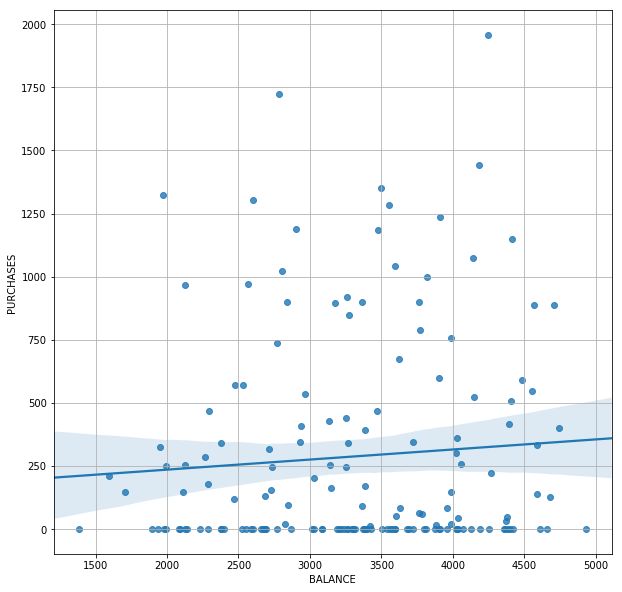

In [769]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [770]:
#Cluster 4:

In [771]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,532.0,1425.850293,284.230557,655.786755,1216.208182,1404.417160,1631.883803,2329.485768
BALANCE_FREQUENCY,532.0,0.997266,0.024165,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,532.0,281.703289,359.782622,0.000000,0.000000,129.500000,452.175000,1956.430000
ONEOFF_PURCHASES,532.0,143.570752,259.067631,0.000000,0.000000,0.000000,177.770000,1423.800000
INSTALLMENTS_PURCHASES,532.0,138.309098,228.312590,0.000000,0.000000,0.000000,206.077500,1057.000000
CASH_ADVANCE,532.0,278.596948,403.972001,0.000000,0.000000,101.475376,381.697257,1962.749428
PURCHASES_FREQUENCY,532.0,0.326128,0.361202,0.000000,0.000000,0.166667,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,532.0,0.105263,0.166083,0.000000,0.000000,0.000000,0.166667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,532.0,0.240288,0.350857,0.000000,0.000000,0.000000,0.437500,1.000000
CASH_ADVANCE_FREQUENCY,532.0,0.123590,0.127901,0.000000,0.000000,0.083333,0.166667,0.500000


In [772]:
cluster=data.iloc[labels_x[4].index,:]

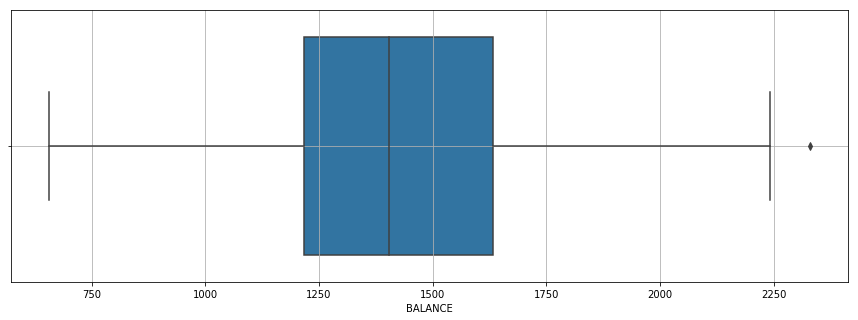

In [773]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


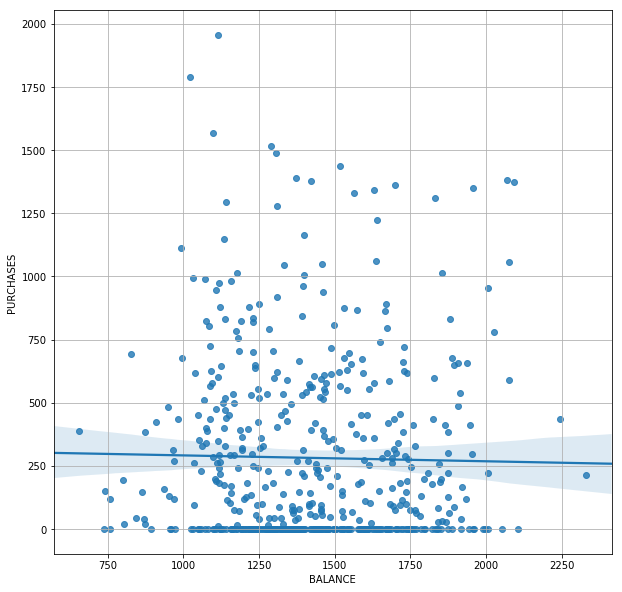

In [774]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [775]:
#Cluster 5:

In [776]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,363.0,429.491813,398.314174,2.117128,84.732398,292.176394,735.914194,1532.106106
BALANCE_FREQUENCY,363.0,0.965690,0.077531,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,363.0,487.263030,444.280360,0.000000,125.500000,368.160000,755.250000,2091.440000
ONEOFF_PURCHASES,363.0,249.922314,367.289203,0.000000,0.000000,25.260000,399.995000,1440.140000
INSTALLMENTS_PURCHASES,363.0,237.340716,274.010365,0.000000,0.000000,132.000000,393.205000,1166.680000
CASH_ADVANCE,363.0,143.367513,336.629164,0.000000,0.000000,0.000000,9.775901,1820.800715
PURCHASES_FREQUENCY,363.0,0.523186,0.367309,0.000000,0.166667,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,363.0,0.124426,0.168312,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,363.0,0.424472,0.403256,0.000000,0.000000,0.333333,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,363.0,0.038567,0.081970,0.000000,0.000000,0.000000,0.041667,0.500000


In [777]:
cluster=data.iloc[labels_x[5].index,:]

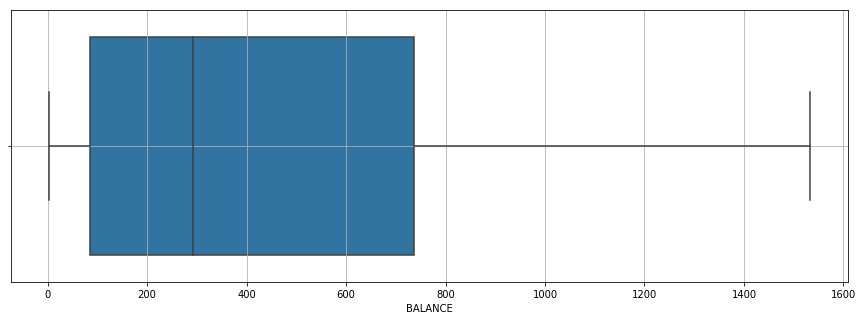

In [778]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


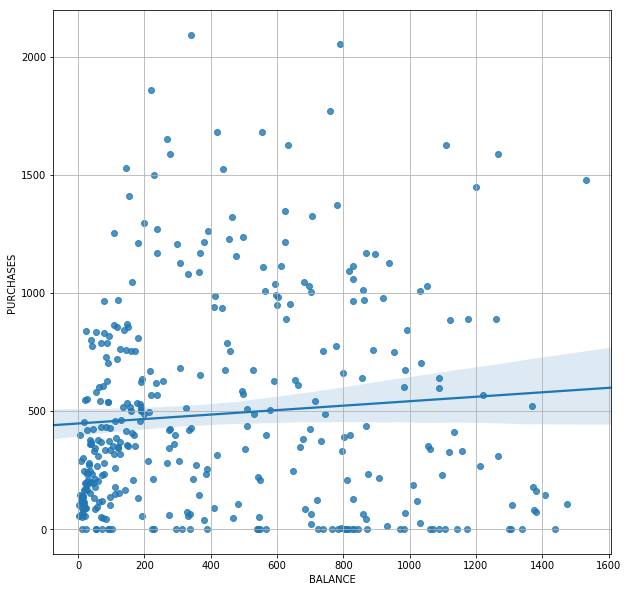

In [779]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [780]:
#Cluster 6:

In [781]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,235.0,835.971873,777.113124,1.198223,145.412143,568.690902,1413.150181,2786.817229
BALANCE_FREQUENCY,235.0,0.967892,0.076496,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,235.0,600.011830,556.999446,0.000000,108.635000,433.200000,969.045000,2238.000000
ONEOFF_PURCHASES,235.0,353.571234,404.638945,0.000000,0.000000,200.000000,628.110000,1424.870000
INSTALLMENTS_PURCHASES,235.0,247.653149,316.656318,0.000000,0.000000,100.000000,427.905000,1152.830000
CASH_ADVANCE,235.0,178.502546,406.704587,0.000000,0.000000,0.000000,108.539511,2234.780695
PURCHASES_FREQUENCY,235.0,0.464184,0.352106,0.000000,0.125000,0.416667,0.750000,1.000000
ONEOFF_PURCHASES_FREQUENCY,235.0,0.184397,0.200705,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,235.0,0.328014,0.369802,0.000000,0.000000,0.166667,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,235.0,0.043262,0.084862,0.000000,0.000000,0.000000,0.083333,0.500000


In [782]:
cluster=data.iloc[labels_x[6].index,:]

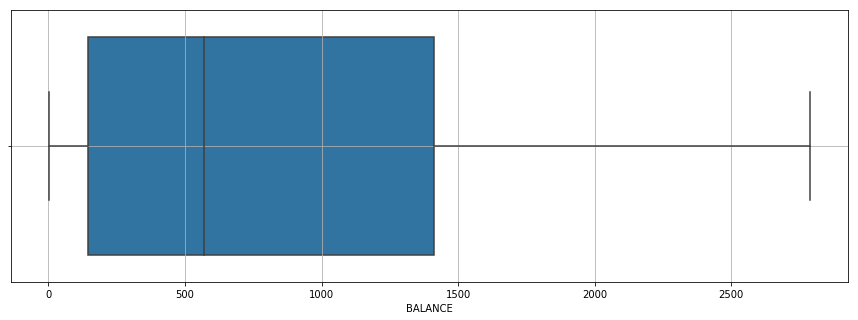

In [783]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


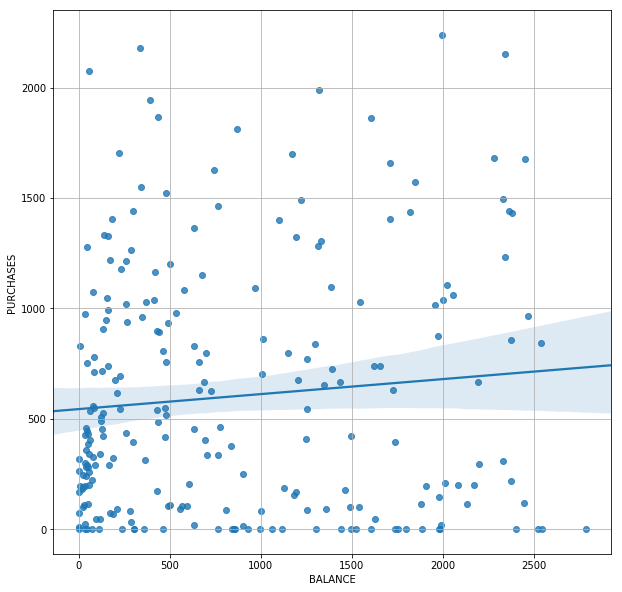

In [784]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [785]:
#Cluster 7:

In [786]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,197.0,1090.324567,583.456928,37.427412,657.831607,1052.799075,1434.097191,2886.330537
BALANCE_FREQUENCY,197.0,0.957084,0.074349,0.727273,0.909091,1.000000,1.000000,1.000000
PURCHASES,197.0,388.100914,511.691981,0.000000,0.000000,114.540000,661.490000,2315.860000
ONEOFF_PURCHASES,197.0,239.629340,389.463527,0.000000,0.000000,0.000000,326.640000,1401.150000
INSTALLMENTS_PURCHASES,197.0,148.471574,257.075646,0.000000,0.000000,0.000000,219.590000,1093.510000
CASH_ADVANCE,197.0,1280.747410,789.945288,0.000000,742.511085,1347.900815,1908.662268,2773.394382
PURCHASES_FREQUENCY,197.0,0.291878,0.343863,0.000000,0.000000,0.083333,0.500000,1.000000
ONEOFF_PURCHASES_FREQUENCY,197.0,0.122250,0.181429,0.000000,0.000000,0.000000,0.250000,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,197.0,0.199239,0.321258,0.000000,0.000000,0.000000,0.333333,1.000000
CASH_ADVANCE_FREQUENCY,197.0,0.198393,0.132090,0.000000,0.083333,0.166667,0.333333,0.500000


In [787]:
cluster=data.iloc[labels_x[7].index,:]

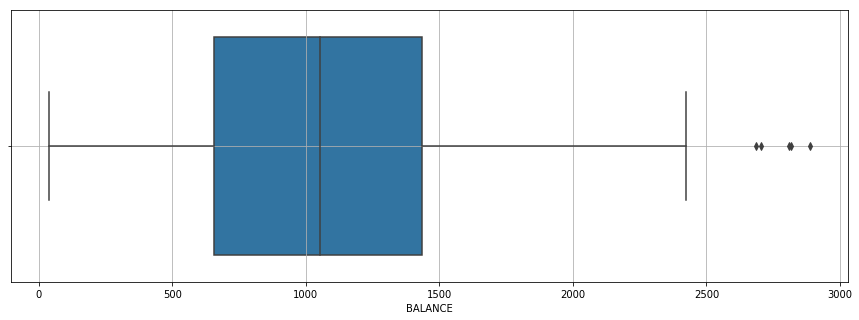

In [788]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


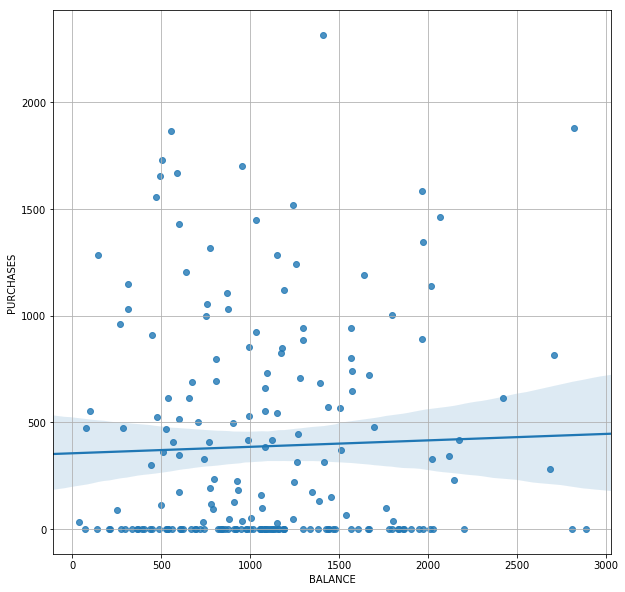

In [789]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [790]:
#Cluster 8:

In [791]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,111.0,3472.010034,819.556899,1777.440238,2832.960276,3441.516174,4131.133102,4940.113918
BALANCE_FREQUENCY,111.0,0.999181,0.008629,0.909091,1.000000,1.000000,1.000000,1.000000
PURCHASES,111.0,579.951261,624.902328,0.000000,0.000000,358.680000,977.825000,2260.410000
ONEOFF_PURCHASES,111.0,376.220811,449.894500,0.000000,0.000000,183.700000,644.025000,1376.540000
INSTALLMENTS_PURCHASES,111.0,203.730450,308.400638,0.000000,0.000000,0.000000,322.100000,1170.490000
CASH_ADVANCE,111.0,660.410452,779.920053,0.000000,0.000000,296.922557,1185.905511,2747.982493
PURCHASES_FREQUENCY,111.0,0.382132,0.357719,0.000000,0.000000,0.333333,0.666667,1.000000
ONEOFF_PURCHASES_FREQUENCY,111.0,0.171922,0.198250,0.000000,0.000000,0.083333,0.333333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,111.0,0.279279,0.348997,0.000000,0.000000,0.000000,0.500000,1.000000
CASH_ADVANCE_FREQUENCY,111.0,0.131381,0.144140,0.000000,0.000000,0.083333,0.250000,0.500000


In [792]:
cluster=data.iloc[labels_x[8].index,:]

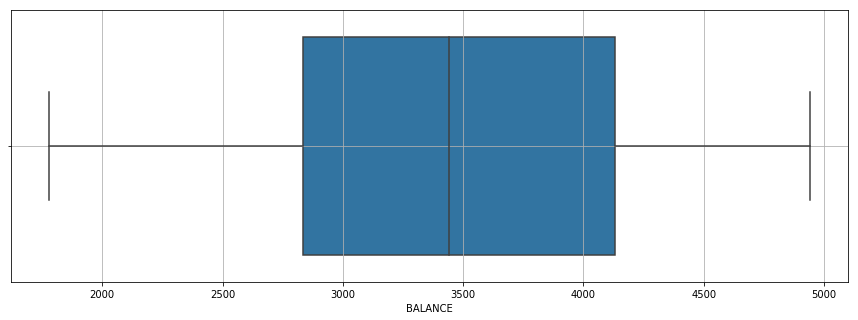

In [793]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


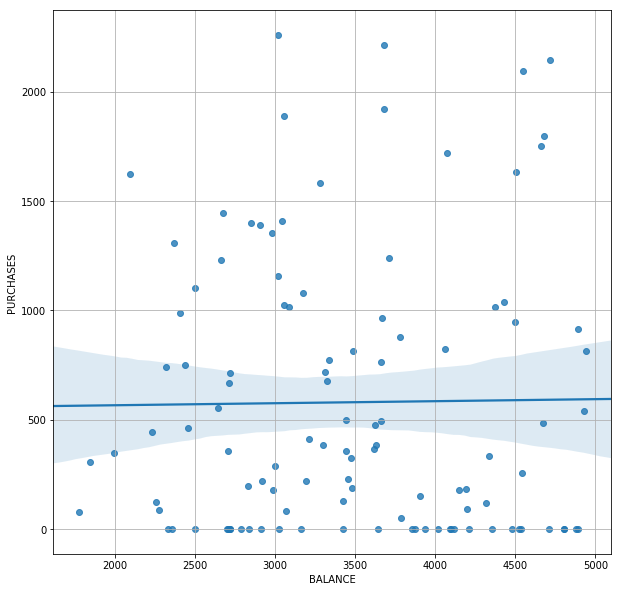

In [794]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [795]:
#Cluster 9:

In [796]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,309.0,2276.424636,524.277322,803.033404,1905.101343,2305.006202,2675.418129,3625.218146
BALANCE_FREQUENCY,309.0,0.994410,0.032692,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,309.0,247.059450,392.154451,0.000000,0.000000,21.750000,382.500000,2197.210000
ONEOFF_PURCHASES,309.0,137.002686,287.847196,0.000000,0.000000,0.000000,118.160000,1425.130000
INSTALLMENTS_PURCHASES,309.0,110.236537,229.227555,0.000000,0.000000,0.000000,81.410000,1095.450000
CASH_ADVANCE,309.0,914.481790,792.583568,0.000000,210.601451,776.012910,1546.052817,2774.385866
PURCHASES_FREQUENCY,309.0,0.249461,0.340957,0.000000,0.000000,0.083333,0.416667,1.000000
ONEOFF_PURCHASES_FREQUENCY,309.0,0.084682,0.165235,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,309.0,0.179072,0.317649,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_FREQUENCY,309.0,0.173409,0.127321,0.000000,0.083333,0.166667,0.250000,0.500000


In [797]:
cluster=data.iloc[labels_x[9].index,:]

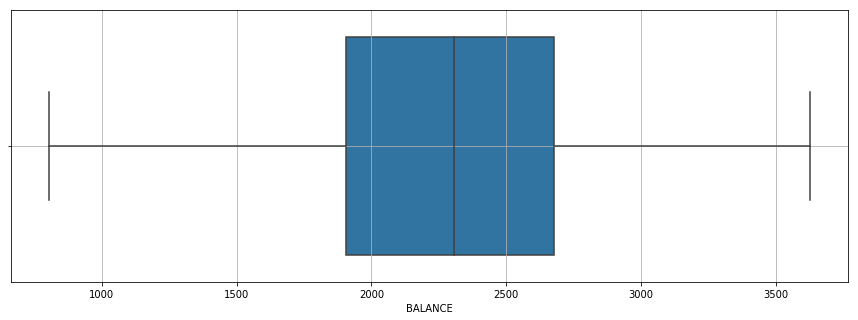

In [798]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


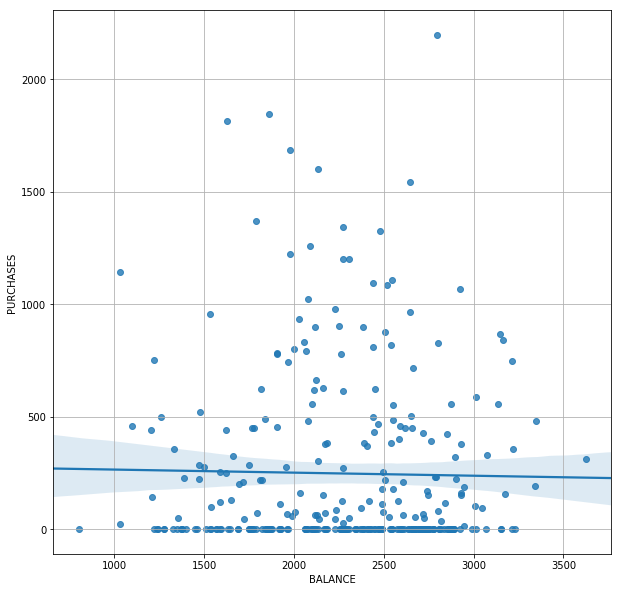

In [799]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()